<span class="badge badge-info">ВЫПУСКНОЙ ПРОЕКТ</span>
# «E-commerce — Анализ товарного ассортимента»

## Описание проекта

Для интернет-магазина товаров для дома «Пока все ещё тут», необходимо **выявить профили покупателей, а также сделать полноценный анализ товарного ассортимента**. Поможем магазину стать лучше, а клиентам — обустроить дом своей мечты.

**Цели проекта**: проанализировать ассортимент товаров:
 - проведите исследовательский анализ данных;
 - проанализируйте торговый ассортимент;
 - сформулируйте и проверьте статистические гипотезы.

## Описание данных

**Таблица `ecommerce` (датасет описывает транзакции интернет-магазина товаров для дома и быта)**

 - date — дата заказа;
 - customer_id — идентификатор покупателя;
 - order_id — идентификатор заказа;
 - product — наименование товара;
 - quantity — количество товара в заказе;
 - price — цена товара.

## Инструкция по выполнению проекта

## Шаг 1. Загрузка, первичный осмотр и предобработка данных

 - 1.1. Импорт библиотек и загрузка данных.
 - 1.2. Осмотр данных.
 - 1.3. Предобработка данных.
 - 1.4. Обработка выбросов.
 - 1.5. Добавление нужных столбцов.
 - 1.6. Выводы о данных.

## Шаг 2. Исследовательский анализ данных

 - 2.1. Посмотрим на данные, за какой период мы располагаем. Поищем аномалии в датах заказов. 
 - 2.2. Посмотрим на активность покупателей, а также построим графики изменения метрик во времени. Поищем аномальных покупателей с аномальным кол-во заказов. 
 - 2.3. Посчитаем сколько заказов сделали клиенты интернет-магазина, и построим графики по изменению кол-во заказов во времени.
 - 2.4. Посмотрим на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени. Найдем бестселлеры за весь период.  
 - 2.5. Построим матрицу корреляций.

## Шаг 3. Категоризация наименования товара

 - 3.1. Лемматизация.
 - 3.2. Категоризация наименования товара.

## Шаг 4. Анализ товарного ассортимента

 - 4.1. Топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.
 - 4.2. Топ-5 самых прибыльных товаров в каждой категории за весь период.
 - 4.3. Посчитаем выручку и количество покупателей по категориям.
 - 4.4. Поищем сезонность товаров по категориям. Проанализируем продажи по категориям по временам года. 

## Шаг 5. Сегментация покупателей на основе истории их покупок

 - 5.1. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисем дендрограмму.
 - 5.2. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем сегменты покупателей.
 - 5.3. Посмотрим на статистику по сегментам покупателей.

## Шаг 6. Проверка статистических гипотез

 - 6.1. Посчитаем статистическую значимость различий в среднем чеке заказа между сегментами покупателей. 
 - 6.2. Посчитаем статистическую значимость различий в среднем объёме продаж между сегментами покупателей.
 - 6.3. Проверим одинаковые средние объёмы продаж в будни и выходные или нет.

## Шаг 7. Общие выводы и рекомендации

## Шаг 8. Презентация и дашборд

-----

## Шаг 1. Загрузка, первичный осмотр и предобработка данных

### 1.1. Импорт библиотек и загрузка данных

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                                         # для анализа данных
import numpy as np                                          # для математических вычислений
import math as mth                                          # для математических вычислений

import seaborn as sns                                       # для визуализации данных
import matplotlib.pyplot as plt                             # для визуализации
import plotly.express as px                                 # для визуализации
%matplotlib inline

import datetime as dt                                       # для преобразования к типу данных 'дата'
import requests                                             # для HTTP запросов
import re                                                   # для работы с регулярными выражениями

from pymystem3 import Mystem                                # для лемматизации
from collections import Counter                             # для подсчёта числа лемматизированных слов  

import scipy.stats as stats
from scipy import stats as st                               # для высокоуровневых математических вычислений 

# Машинное обучение в Python.
from sklearn.preprocessing import StandardScaler            # для стандартизации данных
from sklearn.cluster import KMeans                          # K-Means кластеризация
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     # кластеризация

import warnings                                             # для предупреждений в программе 
warnings.filterwarnings('ignore')                           # фильтр предупреждений

In [2]:
# Загрузка данных. Датасет описывает транзакции интернет-магазина товаров для дома и быта.
ecommerce = pd.read_csv('/datasets/ecommerce_dataset.csv')

In [3]:
# С помощью pd.set_option настроим вывод так чтобы:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', -1)                   # текст в ячейке отражался полностью вне зависимости от длины;
pd.set_option('display.float_format', '{:.2f}'.format)      # все числа отражались с двумя знаками после запятой.

In [4]:
# Установка эстетических параметров графиков.
sns.set(context='talk', style='whitegrid', palette='husl', font='sans-serif', font_scale=1, color_codes=True, rc=None)

### 1.2. Осмотр данных

In [5]:
ecommerce.sample(10, random_state=123) # получение 10 случайно выбранных записей из таблицы ecommerce

,date,customer_id,order_id,product,quantity,price
276,2018101617,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.00
3071,2019042410,30a28353-6829-44be-8158-68895dad31e7,14683,Рассада Капусты краснокачанная сорт Победа кассета 10 шт E10,1,195.00
2476,2019032614,c816fd3d-3783-4fd8-aeab-0e99fab4eb58,70888,Пеларгония розебудная Prins Nikolai укорененный черенок,1,134.00
4286,2019060210,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.00
6122,2019081707,be84bbc4-812f-44f6-ba9b-0386cd8648f2,72320,"Коврик придверный MOHAWK Mansonry Foliage Листопад 58,5х89 см 5412",1,1649.00
3508,2019051015,49d9094d-65f5-4218-83d7-7311a8e03e70,14747,"Флокс метельчатый сорт МОСКВИЧКА, диаметр горшка 10см.",1,135.00
5850,2019071309,6cdb00ba-81ad-46cf-bf6a-bf6f4bbfd451,71963,"Щетка для мытья окон 2 в 1 с телескопической ручкой и поворотным шарниром синяя, Hausmann, ADF1768",1,1424.00
2319,2019031319,bd57cbda-03d8-4758-85e3-b9c671b6bca0,14572,"Калибрахоа Sweet Bells Double Golden желтая махровая объем 0,5 л",1,82.00
1135,2018120821,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20 см 1210035,2,44.00
3352,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,"Бакопа ампельная мега-крупная розовая объем 0,5 л",1,90.00


In [6]:
ecommerce.describe().T # выведем статистику о датасете методом describe()

,count,mean,std,min,25%,50%,75%,max
date,6737.00,2018854551.37,385518.47,2018100100.00,2019020413.00,2019050216.00,2019061022.00,2019103116.00
order_id,6737.00,43128.95,27899.41,12624.00,14827.00,68503.00,70504.00,73164.00
quantity,6737.00,2.50,15.27,1.00,1.00,1.00,1.00,1000.00
price,6737.00,462.03,871.30,9.00,101.00,135.00,398.00,14917.00


In [7]:
ecommerce.isnull().sum() # количество пропущенных значений

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [8]:
ecommerce.duplicated().sum() # количество дубликатов

0

In [9]:
ecommerce.shape # получение размера датасета

(6737, 6)

In [10]:
ecommerce.info() # получение общей информации о данных в таблице ecommerce_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


### Выводы

Наблюдаются следующие проблемы с данными:
 - некорректный тип данных в дате;
 - варьируется регистр букв в столбце с наименованием товара;
 - возможно, присутствуют дубликаты в столбце с наименованием товара и идентификатором заказа;
 - аномалии или выбросы в количестве товара, их стандартное отклонение сильно превышает среднее значение.

Пропуски не обнаружены.

### 1.3. Предобработка данных

#### Рассмотрим значения в столбце `date`.

In [11]:
ecommerce['date'] = pd.to_datetime(ecommerce['date'], format='%Y%m%d%H') # приведем дату к формату даты

In [12]:
ecommerce.rename(columns={'date': 'datetime'}, inplace=True) # переименуем столбец

#### Рассмотрим значения в столбце `product и order_id`.

In [13]:
ecommerce['product'] = ecommerce['product'].str.lower() # приведем наименование товара к нижнему регистру
ecommerce['product'] = ecommerce['product'].str.replace('ё','е', regex=True) # заменим ё на е
ecommerce['product'] = ecommerce['product'].str.replace('(', '', regex=True) # заменим ( на ''
ecommerce['product'] = ecommerce['product'].str.replace(')', '', regex=True) # заменим ) на ''
ecommerce['product'] = ecommerce['product'].str.replace(',', '', regex=True) # заменим , на ''

In [14]:
total_duplicates = ecommerce.duplicated().sum()  # проверка на отсутствие дубликатов
partial_duplicates = len(ecommerce[ecommerce[['product', 
                                              'customer_id', 'order_id']].duplicated() == True][['product', 'order_id']])

print('Количество полных дубликатов: {} строк'.format(total_duplicates))
print('Количество частичных дубликатов: {} строк'.format(partial_duplicates))
print('Доля дубликатов от общего количества записей: {:.2%}'.format((total_duplicates + partial_duplicates) / len(ecommerce))) 

Количество полных дубликатов: 0 строк
Количество частичных дубликатов: 1886 строк
Доля дубликатов от общего количества записей: 27.99%


Наблюдения: доля дубликатов от общего количества записей составляет 28%, принимаю решение их удалить. Возможно произошли сбои при выгрузки данных или при записи. 

Метод dublicated() принимает во внимание все столбцы, здесь он показал, что дубликатов нет. Поэтому было принято решение, проверить на дубли конкретные столбцы с релевантными переменными для анализа, такие как наименование товара и количество заказов совершивших покупателями. Не полные, я имею введу частичные дубли относительно конкретных столбцов, так как в dataframe не было полностью дублированных строк.

In [15]:
# Удалим дубликаты в столбцах 'product', 'customer_id', 'order_id' из таблицы ecommerce.
ecommerce = ecommerce.drop_duplicates(['product', 'customer_id', 'order_id'])
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 6735
Data columns (total 6 columns):
datetime       4851 non-null datetime64[ns]
customer_id    4851 non-null object
order_id       4851 non-null int64
product        4851 non-null object
quantity       4851 non-null int64
price          4851 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 265.3+ KB


### 1.4. Обработка выбросов

#### Рассмотрим значения в столбце `quantity`.

99-й перцентиль кол-ва товара в заказе: 30 
Количество строк с аномальными значениями: 41 строк
Доля аномальных значений от общего количества записей: 0.8%


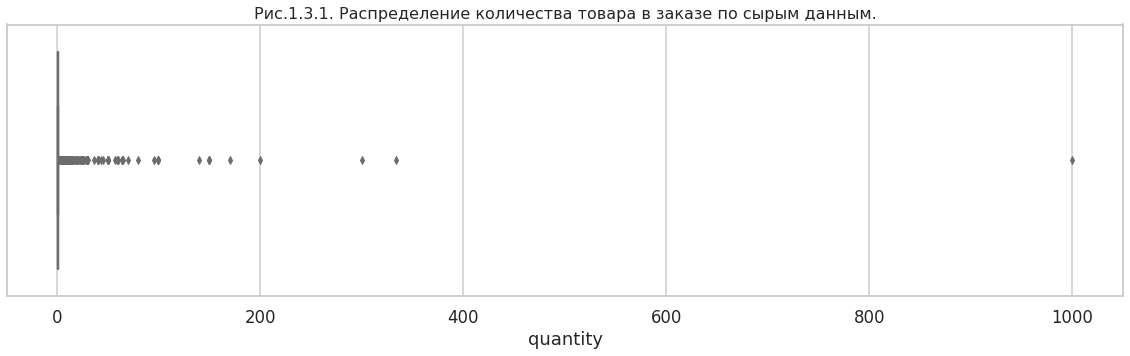

In [16]:
# Удалим выбросы с помощью перцентилей.
upper_limit_quantity = ecommerce['quantity'].quantile(.99) # граница аномальных значений в кол-ве товара в заказе
print('99-й перцентиль кол-ва товара в заказе: {:.0f} '.format(upper_limit_quantity))

# кол-во аномальных значений в столбце 'quantity'
abnormalnumber_q = ecommerce[ecommerce['quantity'] > upper_limit_quantity]['quantity'].count()
print('Количество строк с аномальными значениями: {} строк'.format(abnormalnumber_q))
print('Доля аномальных значений от общего количества записей: {:.1%}'.format(abnormalnumber_q / len(ecommerce))) 

plt.figure(figsize=(20,5))
sns.boxplot(x='quantity', data=ecommerce) # построим график боксплот
plt.title('Рис.1.3.1. Распределение количества товара в заказе по сырым данным.', fontsize=16)
plt.show()

Наблюдения: не более чем 1% транзакций интернет-магазина, имеют больше 30 товаров в корзине. Принимаю решение их удалить.

In [17]:
# удалим из датасета аномальные значения 
ecommerce = ecommerce[(ecommerce['quantity'] < upper_limit_quantity)]

In [18]:
ecommerce.describe().T # выведем статистику о датасете методом describe()

,count,mean,std,min,25%,50%,75%,max
order_id,4793.00,47996.56,27386.27,12624.00,14770.00,68848.00,70808.00,73164.00
quantity,4793.00,1.83,2.78,1.00,1.00,1.00,1.00,29.00
price,4793.00,521.27,950.52,9.00,97.00,150.00,524.00,14917.00


### 1.4. Добавление нужных столбцов.

In [20]:
# Добавим столбец с выручкой c заказа.
ecommerce['revenue'] = ecommerce['quantity'] * ecommerce['price']

In [21]:
# Выделим в отдельные столбцы время, день, неделю, месяц и год, а также полную дату.
ecommerce['hour'] = ecommerce.datetime.dt.hour
ecommerce['day'] = (ecommerce.datetime.dt.dayofweek) + 1 # +1, чтобы понедельник = 1, и так до воскресенья = 7
ecommerce['week'] = ecommerce.datetime.dt.week
ecommerce['month'] = ecommerce.datetime.dt.month
ecommerce['year'] = ecommerce.datetime.dt.year
ecommerce['date'] = ecommerce.datetime.dt.date

Создадим отдельный столбец будни/выходные с бинарными значениями, где 1 = да, а 0 = нет. 

In [22]:
# Напишем функцию sensor_weekdays, принимающую номер дня от 1 до 5 и возвращающую будни, где 1 = да, 0 = нет.
def sensor_weekdays(day):
    if  1 <= day <= 5:
        return 1
    else:
        return 0
    
# Функция sensor_weekends, принимающяя номер дня от 6 до 7 и возвращающую выходные, где 1 = да, 0 = нет.
def sensor_weekends(day):
    if  6 <= day <= 7:
        return 1
    else:
        return 0

In [23]:
# Cоздадим отдельные столбецы будни/выходные в зависимости от дня, 
# и в его ячейках запишем значения возвращаемые функцией.
ecommerce['weekdays'] = ecommerce['day'].apply(sensor_weekdays)
ecommerce['weekends'] = ecommerce['day'].apply(sensor_weekends)
display(ecommerce.shape)
ecommerce.sample(10, random_state=123) 

(4793, 15)

,datetime,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,date,weekdays,weekends
6611,2019-10-15 13:00:00,c34acb45-5fe0-4456-9c9e-9167585b8f7b,72969,сушилка для белья напольная colombo style st460,1,3149.00,3149.00,13,2,42,10,2019,2019-10-15,1,0
1898,2019-02-18 17:00:00,ba82101c-f638-4f89-a7da-35875c710a79,70332,сумка-тележка 2-х колесная gimi argo синяя,1,1087.00,1087.00,17,1,8,2,2019,2019-02-18,1,0
3438,2019-05-07 11:00:00,1a725b7e-f09b-4bc1-8579-b9893adb91f8,14729,петуния sweetunia rose gem розовая с прожилками объем 05 л,1,90.00,90.00,11,2,19,5,2019,2019-05-07,1,0
6289,2019-09-10 07:00:00,3f3cb1b7-b1a6-48ab-b83f-271b4db13752,72568,сушилка для белья напольная colombo flower 30mt st798,1,2249.00,2249.00,7,2,37,9,2019,2019-09-10,1,0
1362,2018-12-25 21:00:00,7a2e18fb-df7b-4fcf-b04c-5f8a9a608715,69598,сумка-тележка 2-х колесная gimi argo синяя,1,1049.00,1049.00,21,2,52,12,2018,2018-12-25,1,0
1805,2019-02-12 19:00:00,dc9eeb94-819e-46a0-9f40-28562193626b,70232,сумка-тележка хозяйственная rolser rg saquet черная saq002 negro convert,1,3562.00,3562.00,19,2,7,2,2019,2019-02-12,1,0
5548,2019-06-23 10:00:00,e576ea28-f37c-49a1-badc-f316f8d23f9e,71780,муляж яблоко оранжевый 85 см полиуретан,10,56.00,560.00,10,7,25,6,2019,2019-06-23,0,1
1849,2019-02-16 18:00:00,7e0fb269-d55f-4e36-bcc4-24968b70e009,14541,рассада зелени для кухни мята морокан диам. 9 см,1,120.00,120.00,18,6,7,2,2019,2019-02-16,0,1
82,2018-10-04 10:00:00,e8a27cb1-6d5a-4161-aac4-11df7dfb4a0e,68523,муляж виноград зеленый 26 см полиуретан fancy fair/g85-g,1,247.00,247.00,10,4,40,10,2018,2018-10-04,1,0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,сковорода алюминиевая с антипригарным покрытием marble alpenkok d = 26 см ak-0039a/26n,1,824.00,824.00,18,1,40,10,2018,2018-10-01,1,0


In [24]:
ecommerce.info() # получение общей информации о данных в таблице ecommerce

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 6735
Data columns (total 15 columns):
datetime       4793 non-null datetime64[ns]
customer_id    4793 non-null object
order_id       4793 non-null int64
product        4793 non-null object
quantity       4793 non-null int64
price          4793 non-null float64
revenue        4793 non-null float64
hour           4793 non-null int64
day            4793 non-null int64
week           4793 non-null int64
month          4793 non-null int64
year           4793 non-null int64
date           4793 non-null object
weekdays       4793 non-null int64
weekends       4793 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(3)
memory usage: 599.1+ KB


### 1.5. Выводы о данных.

 - **На этапе осмотра данных** были выявлены следующие проблемы в данных, такие как, некорректный тип в дате, варьировался регистр букв в столбце с наименованием товара, выбросы в количестве и цене товара.
 - **На этапе предобработки данных** были приняты следующие решения: привели дату к формату даты, привели наименование товара к нижнему регистру, также заменили ё на е. На этом этапе, обнаружили неполные дубликаты в столбце с наименованием товара и идентификатором заказа. Так как, доля дубликатов от общего количества записей составляет почти 28%, приняла решение их удалить. Возможно произошли сбои при выгрузки данных или при записи. 
 - **На этапе обработки выбросов**, удалили из датасета аномальные значения в кол-ве товара с помощью перцентилей. 
 - Также, **добавили нужные столбцы** для дальнейшего исследования. 

Теперь данные годятся для анализа.

## Шаг 2. Исследовательский анализ данных

### 2.1. Посмотрим на данные, за какой период мы располагаем. Поищем аномалии в датах заказов. 

In [25]:
# Найдем минимальную и максимальную дату.
min_datetime = ecommerce['datetime'].min()
max_datetime = ecommerce['datetime'].max()

print("Дата первой записи в логе: {} ".format(min_datetime))
print("Дата последней записи в логе: {} ".format(max_datetime))
print("Период ведения лога: {} ".format(max_datetime - min_datetime))

Дата первой записи в логе: 2018-10-01 00:00:00 
Дата последней записи в логе: 2019-10-31 14:00:00 
Период ведения лога: 395 days 14:00:00 


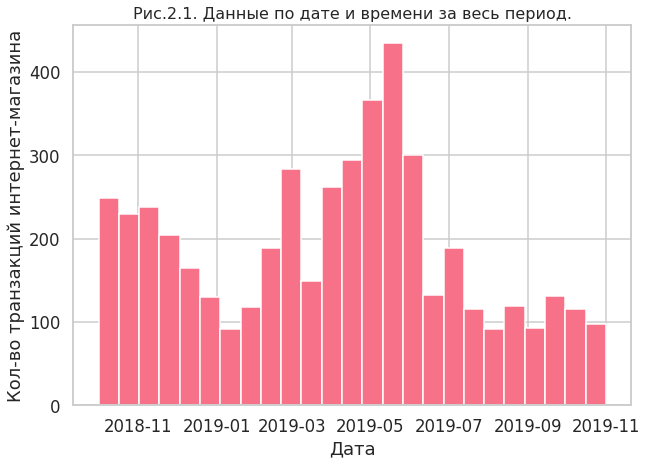

In [26]:
# Построим гистограмму по дате и времени.
plt.figure(figsize=(10,7)) 
plt.title('Рис.2.1. Данные по дате и времени за весь период.', fontsize=16)
ecommerce['datetime'].hist(bins=25, grid=True) #color='#FF7F50'
plt.xticks(rotation=0)
plt.xlabel('Дата')
plt.ylabel('Кол-во транзакций интернет-магазина')
plt.show()

#### Выводы

Судя по гистограмме, мы располагаем данными с 2018-10-01 по 2019-10-31, это 1 год и месяц. С апреля 2019 года виден рост по кол-ву покупок. Пик приходиться на июнь 2019 года. Наблюдается небольшая сезонность по продажам.

#### Поищем аномалии в датах заказов

In [27]:
# Найдем количество заказов, которые относятся сразу к нескольким датам.
order_multiple_dates = ecommerce.groupby('order_id').agg({'date':'nunique'})\
                      .sort_values(by='date', ascending=False).query('date > 1')
print('Количество заказов, которые относятся сразу к нескольким датам: {} заказа'.format(len(order_multiple_dates)))

Количество заказов, которые относятся сразу к нескольким датам: 32 заказа


In [28]:
# Создаем список с заказами с несколькими датам.
list_order_multiple_dates = list(order_multiple_dates.index)
# Удаляем их из датасета.
ecommerce = ecommerce.drop(ecommerce[ecommerce['order_id'].isin(list_order_multiple_dates)].index)

In [29]:
ecommerce['date'] = pd.to_datetime(ecommerce['date'], format = '%Y-%m-%d') # замена типа данных 

#### Выводы

Было обнаружено 32 заказа с несколькими датами на один заказ. Приняла решение их удалить. Предполагаю были сбои при совершении заказа или при записи самих данных. 

### 2.2. Посмотрим на активность покупателей, а также построим графики изменения метрик во времени. Поищем аномальных покупателей с аномальным кол-во заказов. 

Для начала поищем аномальных покупателей с аномальным количеством заказов, если такие найдутся, необходимо будет их удалить.  Затем посмотрим на активность покупателей в интернет магазине.

In [30]:
# Посчитаем общее кол-во покупателей.
customers_total = len(ecommerce['customer_id'].unique())
print("Всего покупателей за весь период: {} человек".format(customers_total))

Всего покупателей за весь период: 2354 человек


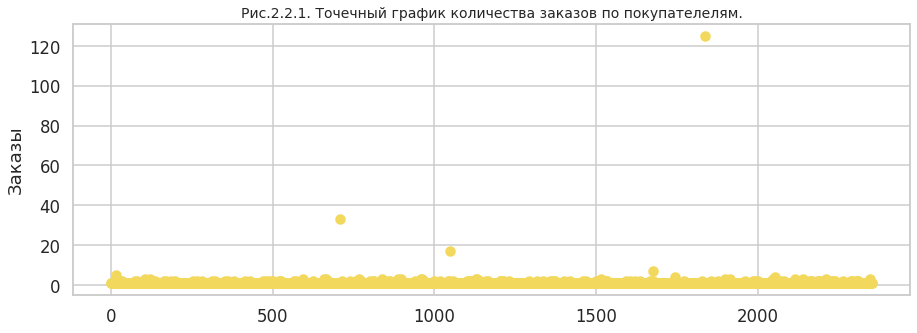

,customer_id,orders
1837,c971fb21-d54c-4134-938f-16b62ee86d3b,125
708,4d93d3f6-8b24-403b-a74b-f5173e40d7db,33
1048,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1677,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
16,0184f535-b60a-4914-a982-231e3f615206,5
...,...,...
796,582ea31d-0500-4ed1-9bc6-7a51c4b54e2e,1
795,57cfa38a-325b-4b03-8419-cd4420053bdd,1
794,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,1
793,57c8999f-ebad-485c-985e-9dc99837775d,1


In [31]:
# Подсчитаем количество заказов по покупателелям и посмотрим на результат.
orders_per_customer = ecommerce.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})
orders_per_customer.columns = ['customer_id','orders']

# Построим точечный график количества заказов по пользователям.
# серия из чисел от 0 до количества наблюдений в orders_per_customer.
x_values = pd.Series(range(0,len(orders_per_customer)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_per_customer['orders'], color='#F2D95D')   
plt.ylabel('Заказы')
plt.title('Рис.2.2.1. Точечный график количества заказов по покупателелям.', fontsize=14)
plt.show()
orders_per_customer.sort_values(by='orders',ascending=False)

Большинство покупателей совершило всего 1 заказ. Клиентов заказавших 3 заказа совсем мало. Также есть пользователи, которые совершали 5, 7, 16, 33 и 125 заказов, что кажется очень странным. Они в полне могут быть аномальными.

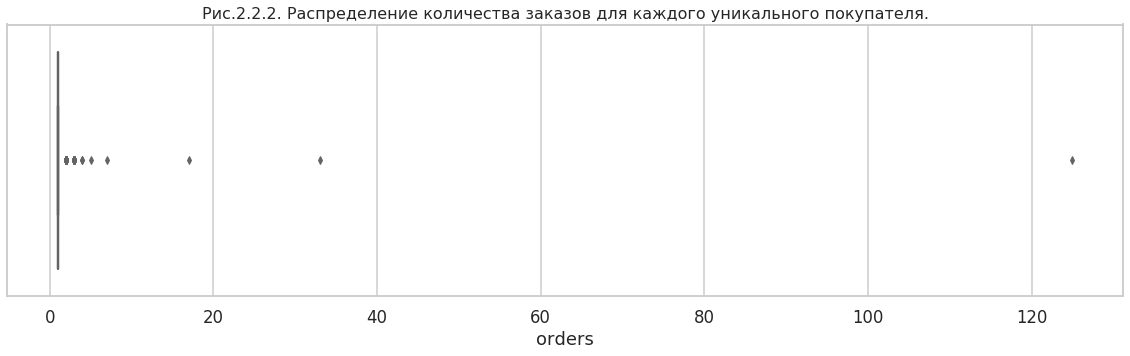

In [32]:
# Построим график боксплот распределения заказов для каждого уникального покупателя.
plt.figure(figsize=(20,5))
sns.boxplot(x='orders', data=orders_per_customer, color='#F2D95D')
plt.title('Рис.2.2.2. Распределение количества заказов для каждого уникального покупателя.', fontsize=16)
plt.show()

In [33]:
# Посчитаем 95-й и 99-й выборочные перцентили количества заказов по покупателелям методом np.percentile()
percentiles = np.percentile(orders_per_customer['orders'], [95, 99])
print('95-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[0]))
print('99-й перцентиль количества заказов на покупателя: {} заказа'.format(percentiles[1]))

95-й перцентиль количества заказов на покупателя: 2.0 заказа
99-й перцентиль количества заказов на покупателя: 3.0 заказа


Не более 5% клиента совершили больше 2 заказов. И не более 1% клиентов – больше 3 заказов. Разумно выбрать 3 заказа на одного клиента за нижнюю границу числа заказов, и отсеять аномальных клиентов по ней.

In [34]:
# Узнаем, сколько всего аномальных покупателей методом len().
abnormal_customers = pd.concat([orders_per_customer[orders_per_customer['orders']>3]['customer_id']], axis = 0)
print('Всего аномальных покупателей: {} человек'.format(len(abnormal_customers)))

Всего аномальных покупателей: 7 человек


In [35]:
# Отсеем аномальных пользователей.
ecommerce = ecommerce.query('customer_id not in @abnormal_customers')

# Посчитаем общее кол-во покупателей после фильтрации. 
customers = len(ecommerce['customer_id'].unique())
print("Всего покупателей за весь период после фильтрации: {} человек".format(customers))

Всего покупателей за весь период после фильтрации: 2347 человек


### Посмотрим на активность покупателей, а также построим графики изменения метрик во времени.

На активных покупателей смотрят в трёх измерениях:
 - DAU (от англ. daily active users) — количество уникальных покупателей в день;
 - WAU (от англ. weekly active users) — количество уникальных покупателей в неделю;
 - MAU (от англ. monthly active users) — количество уникальных покупателей в месяц.
 
Посчитаем метрики. Сгруппируем данные по уникальным покупателям и найдём среднее. Затем построим графики по изменению метрик во времени.

In [36]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее.
dau = ecommerce.groupby('date').agg({'customer_id': 'nunique'}).mean()
wau = ecommerce.groupby(['year', 'week']).agg({'customer_id': 'nunique'}).mean()
mau = ecommerce.groupby(['year', 'month']).agg({'customer_id': 'nunique'}).mean()

print('Среднее кол-во уникальных покупателей за день: {} человек'.format(int(dau)))
print('Среднее кол-во уникальных покупателей за неделю: {} человек'.format(int(wau)))
print('Среднее кол-во уникальных покупателей за месяц: {} человек'.format(int(mau)))

Среднее кол-во уникальных покупателей за день: 6 человек
Среднее кол-во уникальных покупателей за неделю: 42 человек
Среднее кол-во уникальных покупателей за месяц: 183 человек


In [37]:
# Также можно посчитать регулярность пользования интернет-магазином, используя метрику — sticky factor (англ. «липкий фактор»).
sticky_wau = (dau / wau) * 100
sticky_mau = (dau / mau) * 100
print('Недельная аудитория: {}'.format(sticky_wau[0]))
print('Месячная аудитория: {}'.format(sticky_mau[0]))

Недельная аудитория: 14.747516802474275
Месячная аудитория: 3.4044694142803236


По результатам показатели низкие, очевидно, что к интернет-магазину обращаются нечасто.

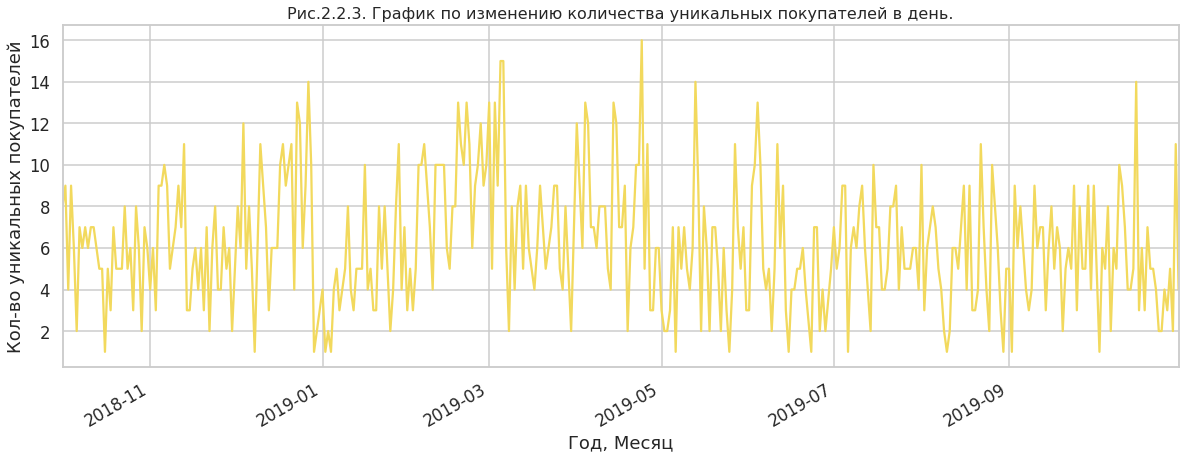

In [38]:
# График по изменению DAW во времени.
ecommerce.groupby(['date']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(20,7), grid=True, legend=False, color='#F2D95D')
plt.title('Рис.2.2.3. График по изменению количества уникальных покупателей в день.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

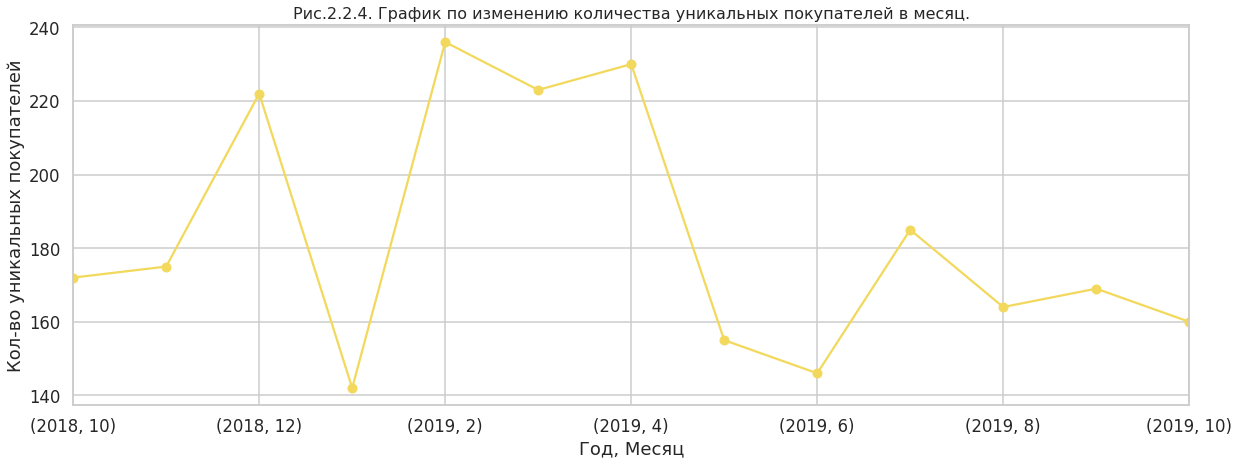

In [39]:
# График по изменению MAU во времени.
ecommerce.groupby(['year', 'month']).agg({'customer_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False, color='#F2D95D')
plt.title('Рис.2.2.4. График по изменению количества уникальных покупателей в месяц.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

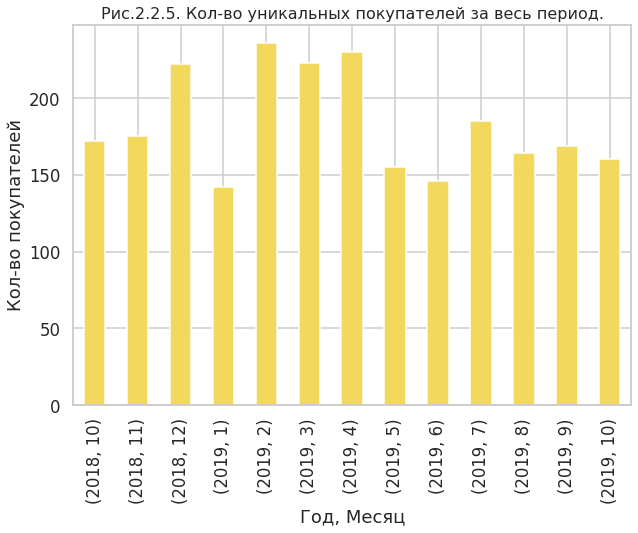

In [40]:
# Построение графика количества уникальных покупателй за весь период.
customers_per_month = ecommerce.pivot_table(index=['year','month'],values='customer_id',aggfunc='nunique')\
                               .drop(['year','month'],axis=1)
customers_per_month.columns = ['customers']
customers_per_month.plot(kind='bar', figsize=(10,7), grid=True, y=['customers'], color='#F2D95D', legend=False)

plt.title('Рис.2.2.5. Кол-во уникальных покупателей за весь период.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во покупателей')
plt.show()

#### Выводы

По «очищенным данным»:
 - Всего покупателей в логе 2347 человек.
 - Большинство покупателей совершило всего 1 заказ.
 - Покупателей заказавших 3 заказа совсем мало.
 - Среднее кол-во уникальных покупателей за день: 6 человек.
 - Среднее кол-во уникальных покупателей за неделю: 42 человек.
 - Среднее кол-во уникальных покупателей за месяц: 183 человек.
 - Недельная аудитория: 14.74%
 - Месячная аудитория: 3.40%

Среднее кол-во уникальных покупателей за месяц 183 человек. Это небольшая цифра. Видно по метрики липкому фактору "sticky factor", его показатели низкие, очевидно, что к интернет-магазину обращаются нечасто.

Исходя из полученных графиков, с января 2019 по февраль 2019 виден рост активности покупателей. Заметно снижение активности с апреля до конца июня 2019 года. В июле 2019 виден небольшой рост по кол-ву уникальных покупателей. Активность покупателей больше всего проявляется в конце и начале года.

### 2.3. Посчитаем сколько заказов сделали клиенты интернет-магазина,  и построим графики по изменению кол-во заказов во времени.

In [41]:
# Посчитаем общее кол-во заказов.
orders_total = len(ecommerce['order_id'].unique())
print("Всего заказов за весь период: {} ".format(orders_total))

Всего заказов за весь период: 2507 


В таблице 2347 уникальных покупателей совершивших 2507 заказа за 395 дней.

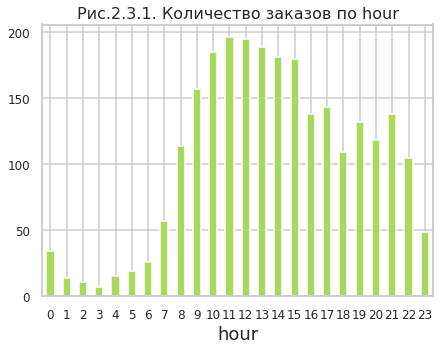

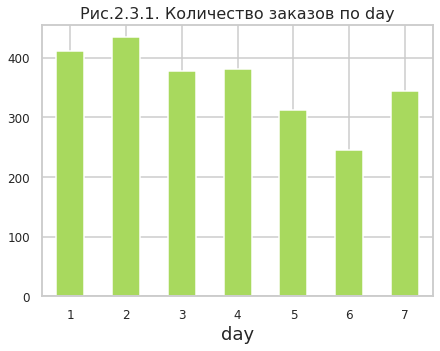

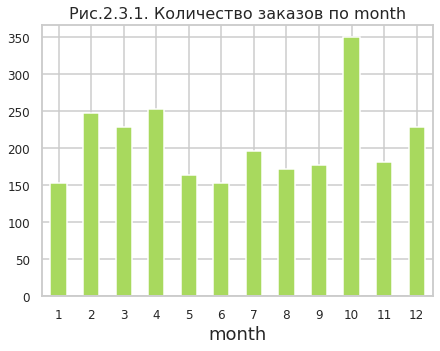

In [42]:
# Цикл для автоматического построения графиков. Посмотрим на распределение заказов во времени, по часам, по дням, по месяцам. 
for columns in ['hour', 'day', 'month']:
    ecommerce.pivot_table(index=columns, values='order_id', aggfunc='nunique', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['order_id'], color='#a8d95e', fontsize=12, legend=False)
    plt.title('Рис.2.3.1. Количество заказов по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

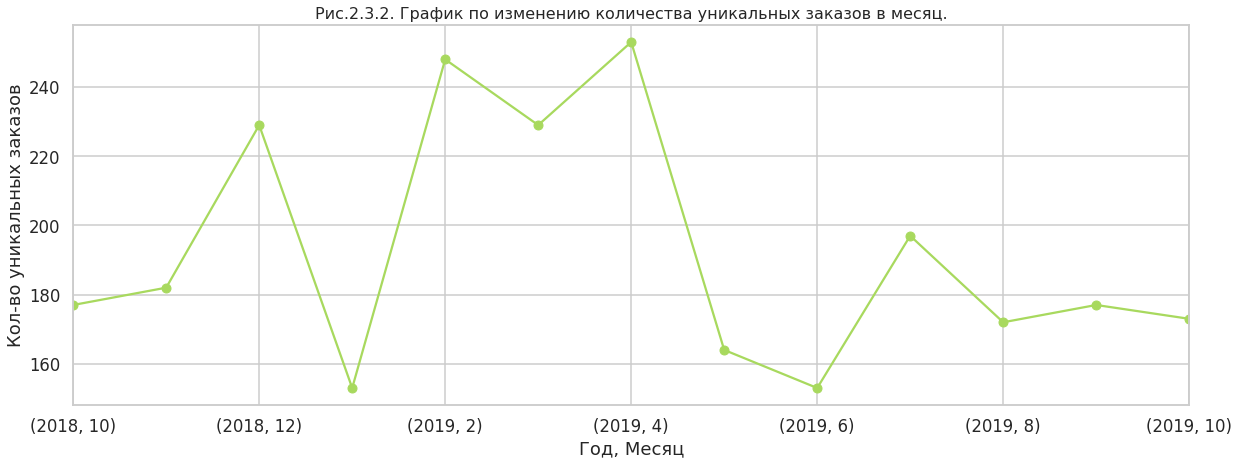

In [43]:
# График по изменению месячных заказов во времени.
ecommerce.groupby(['year', 'month']).agg({'order_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False, color='#a8d95e')
plt.title('Рис.2.3.2. График по изменению количества уникальных заказов в месяц.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных заказов')
plt.show()

orders
year month        
2019 4      253   
     2      248   
2018 12     229   
2019 3      229   
     7      197   
2018 11     182   
     10     177   
2019 9      177   
     10     173   
     8      172   
     5      164   
     1      153   
     6      153

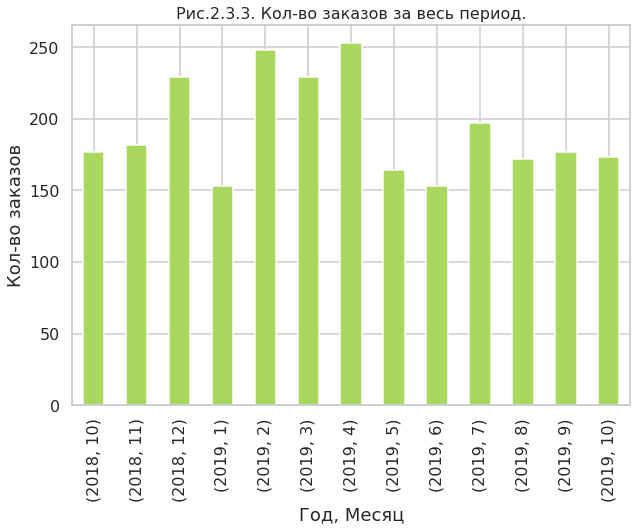

In [44]:
# Посчитаем количество заказов за весь период.
orders_per_month = ecommerce.pivot_table(index=['year','month'],values='order_id',aggfunc='nunique')\
                               .drop(['year','month'],axis=1)
orders_per_month.columns = ['orders']
display(orders_per_month.sort_values(by='orders', ascending=False))

orders_per_month.plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, fontsize=16, color='#a8d95e', legend=False)
plt.title('Рис.2.3.3. Кол-во заказов за весь период.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во заказов')
plt.show()

#### Выводы

 - В таблице 2347 уникальных покупателей совершивших 2507 заказа за 395 дней.
 - Большинство заказов совершаются в первой половине дня с 9 до 15. Пик приходится на 11 часов. Меньше всего клиенты заказываю ночью.
 - С воскресенья виден рост по совершению заказов. Пик приходится на вторник, с наибольшим кол-во заказов. Потом видим снижение, меньше всего заказывают в субботу. 
 - В апреле и феврале 2019 было сделано больше всего заказов, 253 и 248, это связано с активностью клиентов. То есть, количество совершивших заказов, зависит от активности покупателей. 

### 2.4. Посмотрим на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени. Найдем бестселлеры за весь период.  

In [45]:
# Сумма выручки.
revenue_sum = ecommerce['revenue'].sum()
print('Сумма выручки: {:.2f} д.e.'.format(revenue_sum))

Сумма выручки: 2867516.00 д.e.


In [46]:
# Cредняя выручка с покупателя.
revenue_mean = ecommerce['revenue'].mean()
print('Cредняя выручка с покупателя: {:.2f} д.e.'.format(revenue_mean))

Cредняя выручка с покупателя: 645.40 д.e.


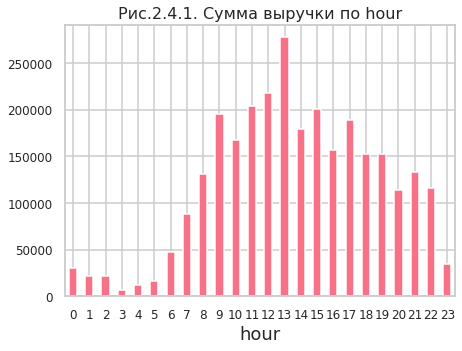

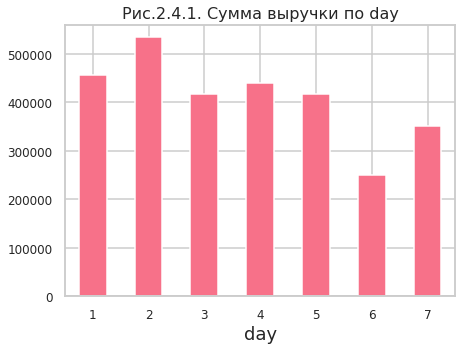

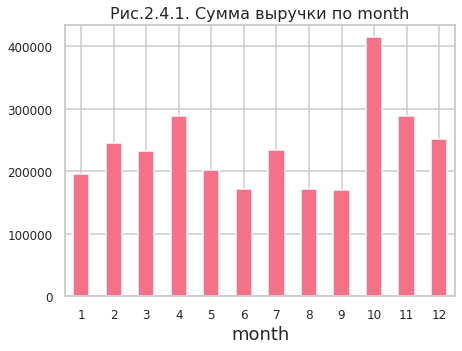

In [47]:
# Цикл для автоматического построения графиков.
for columns in ['hour', 'day', 'month']:
    ecommerce.pivot_table(index=columns, values='revenue', aggfunc='sum', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['revenue'], color='#f77189', fontsize=12, legend=False)
    plt.title('Рис.2.4.1. Сумма выручки по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

revenue  avg_revenue
year month                       
2019 4     288653.00 458.18      
2018 11    288189.00 733.31      
     12    251437.00 982.18      
2019 2     244572.00 771.52      
2018 10    243892.00 615.89      
2019 7     234190.00 767.84      
     3     232831.00 593.96      
     5     202667.00 286.66      
     1     196421.00 1155.42     
     6     172344.00 628.99      
     8     172100.00 864.82      
     10    170429.00 901.74      
     9     169791.00 789.73

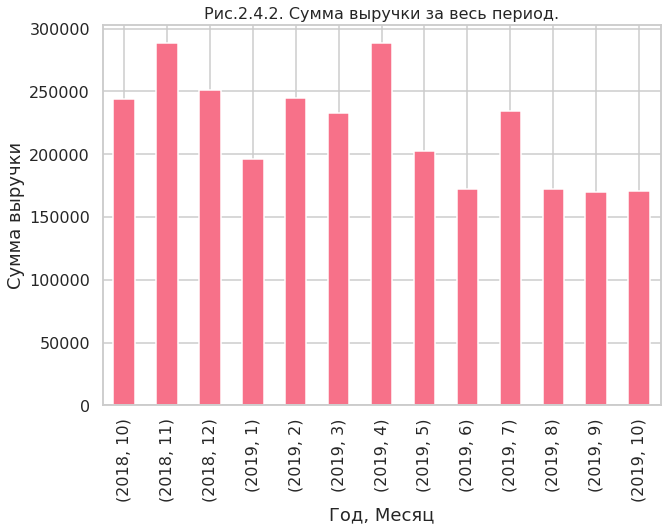

In [48]:
# Посчитаем сумму выручки за весь период.
revenue_per_month = ecommerce.pivot_table(index=['year','month'],values='revenue',aggfunc=['sum', 'mean'])
revenue_per_month.columns = ['revenue', 'avg_revenue']
display(revenue_per_month.sort_values(by='revenue', ascending=False))

revenue_per_month.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, color='#f77189', fontsize=16, legend=False)
plt.title('Рис.2.4.2. Сумма выручки за весь период.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Cумма выручки')
plt.show()

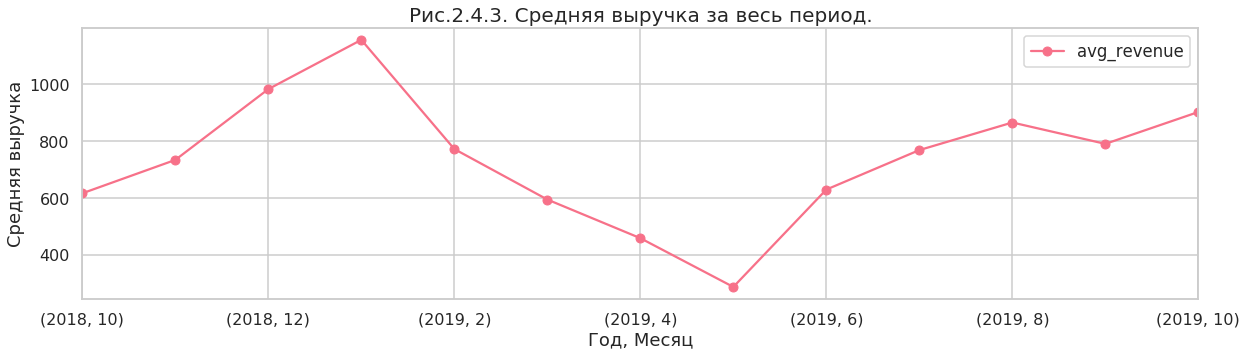

In [49]:
# Посчитаем среднюю выручку за весь период.
avg_revenue_per_month = ecommerce.pivot_table(index=['year','month'],values='revenue',aggfunc='mean')
avg_revenue_per_month.columns = ['avg_revenue']
avg_revenue_per_month.sort_values(by='avg_revenue', ascending=False)

avg_revenue_per_month.plot(marker='o', y=['avg_revenue'], figsize=(20,5), grid=True, color='#f77189', fontsize=16)
plt.title('Рис.2.4.3. Средняя выручка за весь период.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Средняя выручка')
plt.show()

,year,month,revenue,customers,orders,revenue_per_customer,revenue_per_order
1,2018,11,288189.00,175,182,1646.79,1583.46
0,2018,10,243892.00,172,177,1417.98,1377.92
3,2019,1,196421.00,142,153,1383.25,1283.80
7,2019,5,202667.00,155,164,1307.53,1235.77
9,2019,7,234190.00,185,197,1265.89,1188.78
6,2019,4,288653.00,230,253,1255.01,1140.92
8,2019,6,172344.00,146,153,1180.44,1126.43
2,2018,12,251437.00,222,229,1132.60,1097.98
5,2019,3,232831.00,223,229,1044.09,1016.73
10,2019,8,172100.00,164,172,1049.39,1000.58


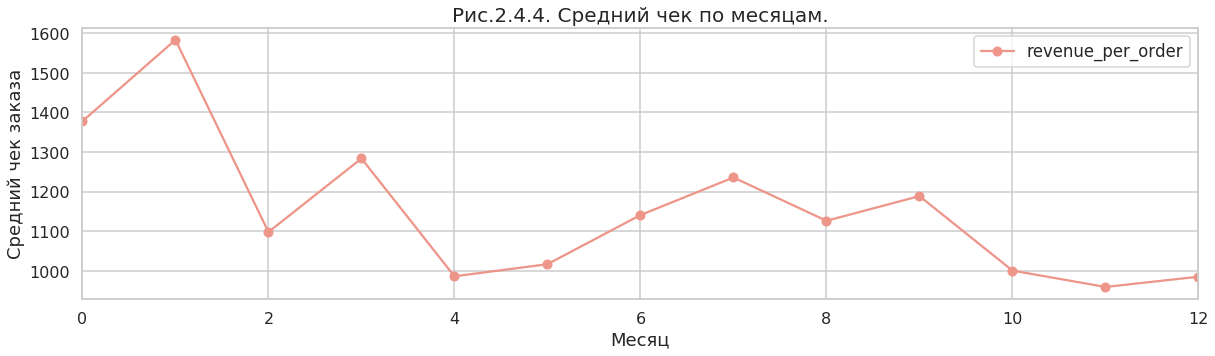

In [50]:
# Найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customer_id.
avg_check = ecommerce.groupby(['year','month']) \
                                    .agg({'revenue':'sum','customer_id':'nunique', 'order_id':'nunique'}).reset_index()
avg_check.columns = ['year', 'month', 'revenue', 'customers', 'orders'] # переименуем столбцы 
avg_check['revenue_per_customer'] = avg_check['revenue'] / avg_check['customers']

# Найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
avg_check['revenue_per_order'] = avg_check['revenue'] / avg_check['orders']

display(avg_check.sort_values(by='revenue_per_order',ascending=False))

avg_check.plot(marker='o', y=['revenue_per_order'], figsize=(20,5), grid=True, color='#ee9589', fontsize=16)
plt.title('Рис.2.4.4. Средний чек по месяцам.', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Средний чек заказа')
plt.show()

#### Выводы

 - Сумма выручки: 2867516.00 д.e.
 - Cредняя выручка с покупателя: 645.40 д.e.
 - День недели вторник в 13:00 дня самый продуктивный, приносит больше всего выручки. 
 - В течение всего периода 2018-2019 г.г. наблюдается негативная динамика суммарной выручки от продаж. Общая сумма выручки в конце 2019 г. сократилась почти в 1,5 раза, относительно прошлого года. Возможно причиной могло послужить общее ухудшение условий предпринимательской деятельности.
 - Темп роста продаж = (выручка текущего периода / выручка прошлого периода) * 100 = (170429 / 243892) * 100 = 69,87%. Так, в 2019 году темп роста продаж интернет-магазина составил 69,87% по сравнению с 2018 годом. Мы видим, что динамика продаж отрицательная.
 - Снижение доходов с продаж также видно по среднему чеку покупателя. В октябре 2018 года средний чек покупателя составлял 1417,98, а через год, в октябре 2019 г. 1065,18 д.е.

### Какие товары интернет-магазина приносят наибольшую прибыль. Найдем бестселлеры за весь период. 

,order_id,product,revenue
0,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,47385.00
1,68878,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",24370.00
2,70080,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,16536.00
3,71206,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,15680.00
4,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,14917.00


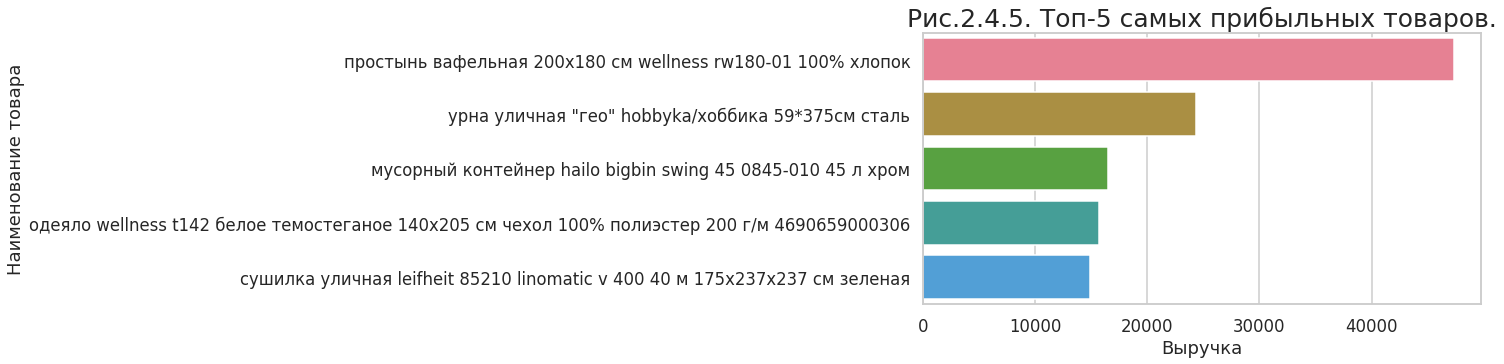

In [51]:
# Посмотрим какие товары интернет-магазина приносят наибольшую прибыль.
most_profit_products = ecommerce.pivot_table(index=['order_id','product'], values='revenue', aggfunc='sum')\
                               .sort_values(by='revenue', ascending=False).reset_index()
display(most_profit_products.head())
plt.figure(figsize=(10,5))
plt.title('Рис.2.4.5. Топ-5 самых прибыльных товаров.', fontsize=25) #alpha=.80
sns.barplot(x='revenue', y='product', data=most_profit_products[:5]).set(xlabel='Выручка', 
                                                                         ylabel='Наименование товара')
plt.show()

,order_id,product,quantity
0,70327,эхинокактус грузони d-5 см,29
1,68908,коврик придверный attribute nature кокосовый 60x40 см amc015,27
2,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27
3,71351,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,26
4,68599,муляж яблоко зеленый 9 см полиуретан,25


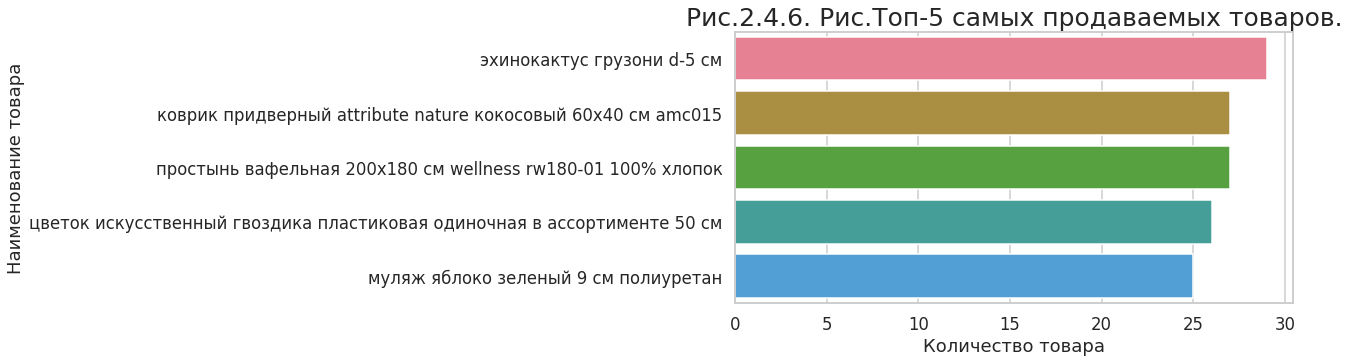

In [52]:
# Бестселлеры за 2018-2019 г.г.
all_time_best_sellers = ecommerce.pivot_table(index=['order_id','product'],\
                                                   values='quantity',\
                                                   aggfunc='sum').sort_values(by='quantity',ascending=False).reset_index()
display(all_time_best_sellers.head())

plt.figure(figsize=(10,5))
plt.title('Рис.2.4.6. Рис.Топ-5 самых продаваемых товаров.', fontsize=25) #alpha=.80
sns.barplot(x='quantity',y='product',data=all_time_best_sellers[:5]).set(xlabel='Количество товара', 
                                                                         ylabel='Наименование товара')
plt.show()

#### Выводы

**Топ-5 самых прибыльных товара за весь период** 
 - простынь вафельная 200х180 см wellness 
 - урна уличная "гео" hobbyka/хоббика
 - мусорный контейнер hailo bigbin swing 45
 - одеяло wellness t142 белое темостеганое 140х205 см
 - сушилка уличная leifheit 85210 linomatic 

**Топ-5 самых продаваемых товаров за весь период**
 - эхинокактус грузони d-5 см	
 - коврик придверный attribute nature кокосовый 60x40 см amc015	
 - простынь вафельная 200х180 см wellness rw180-01 100% хлопок	
 - цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см	
 - муляж яблоко зеленый 9 см полиуретан	

### 2.5. Построим матрицу корреляций.

Для выявления коррелирующих признаков в датафрейме построим матрицу корреляции с помощью метода .corr()

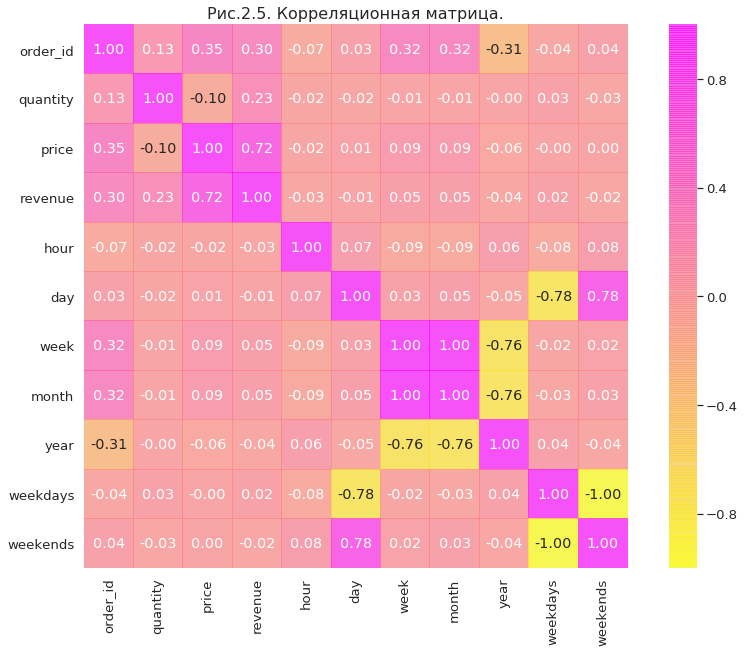

In [53]:
# Построим матрицу корреляций и отобразим её.
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(data=ecommerce.corr(), annot=True, square=True, alpha=.65, fmt='.2f', cmap='spring_r') 
plt.title('Рис.2.5. Корреляционная матрица.', fontsize=16)
plt.show()

#### Выводы

Наблюдается логическая взаимозависимость между переменными. 
Есть небольшая взаимозависимость выручки с ценой товара, corr = 0,72, то есть чем выше цена товара, тем больше выручка. Также, есть другие переменные, которые положительно коррелируют с выручкой, это количество заказов и товара.

## Шаг 3. Категоризация наименования товара

### 3.1. Лемматизация.

In [54]:
# Посмотрим уникальные значения столбца 'product', используя метод unique().
unique_product = ecommerce['product'].unique() 

# Выделим леммы в значениях столбца с наименованием товара, которые пригодиться для создания словаря, 
# который будем исползать для категоризации товара.
m = Mystem()
string = '; '.join(unique_product) # сохраным результат в переменной string
lemmas = m.lemmatize(string) # сохраным результат в переменной lemmas
#print(Counter(lemmas)) # посчитаем количество упоминаний, вызовом Counter из модуля collections

### Вывод

Из упомянутых лемм в значениях столбца с 'product', выделю следующие 10 категорий: 
 - хранение 
 - мебель
 - кухня 
 - ванная
 - текстиль 
 - сад
 - уборка
 - инструменты
 - гигиена
 - декор

### 3.2. Категоризация наименования товара.

Для составления словаря для категоризации будем использовать список с уникальным наименованием товара unique_product, c посчитанным количеством упоминаний вызовом Counter.

In [55]:
# Cоздадим словарь с категориями и списком слов из лемм и списка unique_product.

category_dictionary = {
    'хранение':['бак','вакуумный','весы','петля','вешалка','вешалки','вкладыши','корзина','короб','коробка','кофр', 
                'крючок','обувная','лоток','мусора','монетчатый','мусорный','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','складная','стеллаж','сумка','тележка',
                'хозяйственная','урна','этажерка','ящик'],
    
    'мебель': ['подставка','стеллаж','комод','карниз','этажерка','пуф','обувниц','светиль','фото',
               'для обув','комод','защитный','обувница','обуви','светильник'],
    
    'кухня':['банка','бидон','блюдо','блюдце','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный','кружка',
             'крышка', 'кувшин', 'кухонное','кухонные','столовая','чайная','холодца','мантоварка',
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
             'набор бокалов','набор для пикника','набор ножей','webber','набор стаканов','набор столовых приборов',
             'набор фужеров','фужер','стакан','салатник','нож','ножеточка','овощеварка','овощечистка',
             'подушка','покрывало','просеиватель','противень','разделочная','салатник','салфетка','сковорода',
             'скребок','соковарка','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 'терка',
             'термокружка','толкушка','фал','форма','хлебница','ложка','чайная','чайник','электроштопор','сито', 
             'подставка для яйца'],
    
    'ванная':['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','коврик','ванной', 
              'ковш','мыльница','ванн','подголовник','пробка','унитаза'],
    
    'текстиль':['скатерть','двуспальное','постельное','белье', 'ковер', 'кольца', 'штор', 'полотенце','штора', 
                'ковер', 'махровое','халат','набор ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
                'подкладка', 'чехол','полотенце','простыня','скатерть','халат','чехол','штора',
                'простынь вафельная 200х180 см wellness', 'наматрацник natures бархатный', 'покрывало жаккард шенилл birhome',
                'покрывало жаккард шенилл'],
    
    'cад':['а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','бак','баклажан',
           'бакопа','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма',
           'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 
           'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 'календула', 'калибрахоа', 
           'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника',
           'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 
           'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
           'петрушка','морковь', 'мята', 'настурция','незабудка','нолина', 'огурец', 'растение','однолетнее', 'осина',
           'орехоколка','патиссон','пахира', 'пеларгония', 'пеларгония', 'петрушка', 'петуни', 'подвесное',
           'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 
           'спатифиллум','суккулент','сциндапсус', 'тимьян','томат', 'томата', 'тортница', 'тюльпан', 'рассада', 
           'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера',
           'хризолидокарпус', 'циперус', 'юкка нитчатая', 'рассада зелени для кухни', 'нефролепис', 'овсянница сизая серый',
           'хлорофитум'],
    
    'уборка':['ароматизиро', 'белье', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор vileda', 
              'набор прищепок','доска','губка','гладильная','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка', 'насадка','швабры','мытья','швабре','сушилка','настенная','настурция','ведра', 
              'пена','перчатки','тряп','швабр','совок','гладил','глажен','прищеп','налет','антижир','пылесос','крем', 
              'стир', 'щетка','сушилк','веник','подрукавник','совком', 'для чистки','стирки','мыть', 'средство',
              'мойк', 'утюг', 'покрытие','гладильной', 'пылесос','гладильной','совок','щетка','средство', 
              'таз','тряпка','корзина','швабра','щетка','средство', 'таз', 'корыто', 'паста для полировки', 
              'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'совок','чистящий','чистки','антижир','ведр','ерш','тряпка','отбеливатель','для стирки','стиральный',
              'сушилка для белья', 'настенная сушилка для', 'чехол для гладильной доски', 'сушилка для белья',
              'ароматизированное средство дудаления', 'чехол для гладильной доски', 'сушилка для белья', 'attribute', 'gimi',
              'сушилка для белья потолочная лиана люкс', 'сушилка для белья потолочная лиана люкс', 
              'сушилка для белья потолочная zalger lift basic', 'linomatic', 'сушилка уличная', 'leifheit', 
              'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237'],

    
    'инструменты':['инструмент','сверел','сверло','напильник','стремянк','стяжк','шпингалет','сварка',
                   'миксер','крепеж','пружин','петл','линейк','гои','бензин','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительного','многофункциональный','набор прецизионных','полировки',
                   'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 'чехол eurogold reflector' ],
    
    'гигиена':['зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен'],
    'декор':['искусственная', 'искусственный', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный',
            'фоторамка', 'комнатное растение в горшке', 'муляж баклажан' ],
}

In [56]:
# Напишем функцию которая вернет категорию по значению ‘product’.
def categorize_product(product):
    """ 
    Возвращает категорию по значению ‘product’ в датасете ‘ecommerce’, 
    используя словарь с категориями ‘category_dictionary’.
    """ 
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [57]:
# Осталось создать отдельный столбец с категориями по наименованию товара, 
# и в его ячейках записать значения, возвращаемые функцией.
ecommerce['category'] = ecommerce['product'].apply(categorize_product)
display(ecommerce.shape)
ecommerce.sample(10)

(4443, 16)

,datetime,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,date,weekdays,weekends,category
1526,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69850,сушилка для белья на батарею сб5-45 ника,1,134.00,134.00,15,3,3,1,2019,2019-01-16,1,0,cад
297,2018-10-17 18:00:00,7059aee2-80ae-4cdf-9d0d-31d41f665dca,68678,сумка-тележка 2-х колесная gimi argo синяя,1,1049.00,1049.00,18,3,42,10,2018,2018-10-17,1,0,хранение
3583,2019-05-12 19:00:00,cdd08c5f-5b8c-4abf-8bdf-ed6dcffabff9,14754,пеларгония зональная махровая лососевая,1,150.00,150.00,19,7,19,5,2019,2019-05-12,0,1,cад
899,2018-11-21 13:00:00,569a125e-421b-4664-8d76-f13f514f5d84,69072,салатник luminarc арти грин 165 см j1392,1,82.00,82.00,13,3,47,11,2018,2018-11-21,1,0,кухня
903,2018-11-21 13:00:00,569a125e-421b-4664-8d76-f13f514f5d84,69072,салатник luminarc amбиантэ анис 16 см l6415,1,89.00,89.00,13,3,47,11,2018,2018-11-21,1,0,кухня
708,2018-11-08 16:00:00,8dbfb5d0-837c-4cb7-a5d9-88ff7ed304e8,68919,муляж морковь 16 см,1,59.00,59.00,16,4,45,11,2018,2018-11-08,1,0,cад
5850,2019-07-13 09:00:00,6cdb00ba-81ad-46cf-bf6a-bf6f4bbfd451,71963,щетка для мытья окон 2 в 1 с телескопической ручкой и поворотным шарниром синяя hausmann adf1768,1,1424.00,1424.00,9,6,28,7,2019,2019-07-13,0,1,уборка
31,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,муляж зеленое яблоко полиуретан d-6 см,1,22.00,22.00,11,2,40,10,2018,2018-10-02,1,0,cад
961,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,ящик почтовый металлический с ушками для навесного замка домик 1205251,1,172.00,172.00,9,6,47,11,2018,2018-11-24,0,1,хранение
6098,2019-08-15 09:00:00,e7833283-956b-43f0-9a2b-0b71e229c1a1,72297,коврик влаговпитывающий ребристый 60х90 см стандарт черный 5881,2,419.00,838.00,9,4,33,8,2019,2019-08-15,1,0,ванная


In [58]:
# Выведем статистику по категориям товарного ассортимента.
category_ecommerce = ecommerce.groupby('category').agg({'product':'count'}).reset_index()
category_ecommerce.columns = ['category', 'products']
category_ecommerce['ratio'] = ((category_ecommerce['products'] / len(ecommerce))*100).round(1).astype('str')+'%'
display(category_ecommerce.sort_values(by='products', ascending = False))

,category,products,ratio
0,cад,2550,57.4%
9,хранение,573,12.9%
5,кухня,299,6.7%
3,декор,271,6.1%
8,уборка,257,5.8%
1,ванная,247,5.6%
7,текстиль,141,3.2%
4,инструменты,62,1.4%
6,мебель,30,0.7%
2,гигиена,13,0.3%


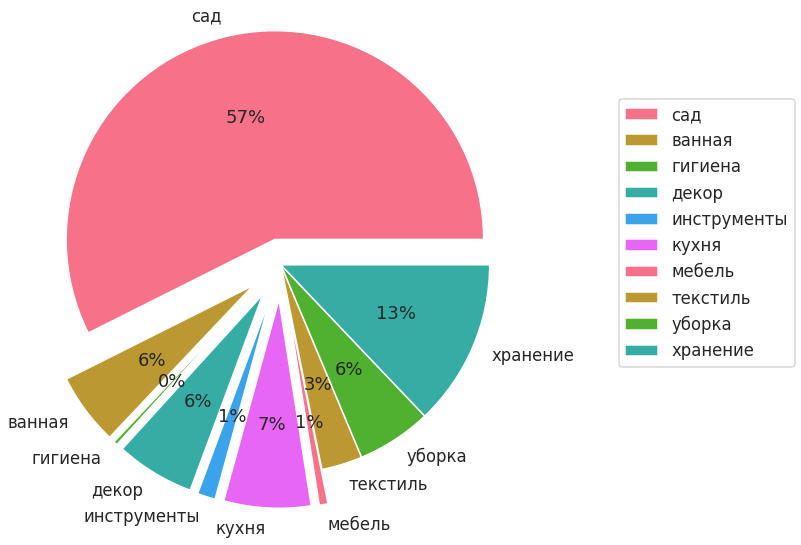

In [59]:
# Построим круговую диаграмму. 
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')
(category_ecommerce.plot(kind='pie', y=['products'], figsize=(8, 8), autopct='%1.0f%%', legend=False, pctdistance=0.6, 
                      labels = category_ecommerce['category'], labeldistance=1.1, radius=1.2, 
                       explode = (0.15, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0, 0, 0)
                      )\
                 .set(ylabel=''))
#plt.title('Рис.3.2. Распределение товарного ассортимента по категориям.', fontsize=18)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

### Вывод

Самую большую долю товарного ассортимента занимает категория «сад» 57% от общего количества товарного ассортимента, можно её назвать основной. В эту категорию вошли все растения, рассада и элементы для дачи и сада. Потом идет категория «хранение» 13%, «кухня» 7%, «декор» 6%, «уборка» 6% и «ванная» 6%.

## Шаг 4. Анализ товарного ассортимента

### 4.1. Топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.

In [60]:
# Сгруппируем данные по наименованию товара для кажкой категории. 
groupby_product = ecommerce.groupby('product')\
                           .agg({'category':'first', 'order_id':'nunique', 'customer_id':'nunique', 
                                 'quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='order_id', ascending=False)
groupby_product.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

# Найдем топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.
for category in groupby_product['category'].unique():
    print()
    display("ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «{}»".format(category))
    display(groupby_product[groupby_product['category']==category].head(5))
    print()

'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «cад»'

,product,category,orders,customers,quantity,revenue
986,пеларгония розебудная red pandora укорененный черенок,cад,62,61,80,10788.00
984,пеларгония розебудная prins nikolai укорененный черенок,cад,51,48,58,7820.00
958,пеларгония зональная диам. 12 см сиреневый полумахровый,cад,49,45,56,9464.00
983,пеларгония розебудная mary укорененный черенок,cад,37,33,45,6066.00
985,пеларгония розебудная queen ingrid укорененный черенок,cад,30,28,38,5175.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «хранение»'

,product,category,orders,customers,quantity,revenue
1524,сумка-тележка 2-х колесная gimi argo синяя,хранение,44,41,44,47258.00
1781,тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,15,15,15,10983.00
1780,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,13,13,14,9523.00
734,муляж баклажан 18 см,хранение,10,10,23,1357.00
1782,тележка багажная delta тбр-20 черный с серым грузоподъемность 25 кг сумка 50 кг каркас россия,хранение,9,10,10,7306.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «уборка»'

,product,category,orders,customers,quantity,revenue
1740,таз пластмассовый со стиральной доской иж 1404021,уборка,9,9,9,2997.00
265,гладильная доска ника blues 124х46 см 5757,уборка,7,7,7,17786.00
283,гладильная доска ника дсп эконом 1065х29 эк1,уборка,7,6,17,7633.00
1083,подрукавник складной ника п,уборка,5,5,5,1120.00
275,гладильная доска ника бэлль 1065х29 см б,уборка,5,5,5,2734.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «декор»'

,product,category,orders,customers,quantity,revenue
784,муляж персики мини полиуретан d-6 см,декор,7,7,27,564.00
1982,цветок искусственный крокус 20 см,декор,7,5,41,855.00
796,муляж яблоко оранжевый 85 см полиуретан,декор,6,6,52,2838.00
763,муляж красное яблоко мини полиуретан d-6 см,декор,6,6,33,672.00
779,муляж перец чили в связке красный 60 см полиуретан fancy fair/ff rp60,декор,5,5,10,1870.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «текстиль»'

,product,category,orders,customers,quantity,revenue
1078,подкладка под чехол zalger 520114 135х50 см войлок,текстиль,7,7,9,1143.00
1079,подкладка под чехол zalger 520140 135х50 см поролон,текстиль,6,6,6,762.00
2047,чехол для гладильной доски attribute metal 140х60 см abm106,текстиль,5,5,14,10530.00
2074,чехол для костюма 60х110 см rozenbal r261016,текстиль,4,4,6,984.00
2063,чехол для гладильной доски zalger 520116 130х46 см хлопок для доски 125х42 см,текстиль,3,3,3,373.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «ванная»'

,product,category,orders,customers,quantity,revenue
1416,сиденье в ванну раздвижное белый св5 ника,ванная,5,5,6,1728.00
345,ерш унитазный с деревянной ручкой ваир 1712012,ванная,5,5,55,3086.00
2141,штора для ванной комнаты quadretto 240х200 см белая bacchetta 4062,ванная,5,5,5,5995.00
612,корыто оцинкованное 45 л бесшовное 1303007,ванная,5,5,7,5243.00
540,коврик хлопковый 40х60 см цвета в ассортименте 6194,ванная,5,4,12,1164.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «кухня»'

,product,category,orders,customers,quantity,revenue
652,"кувшин пластмассовый с крышкой ""кумган"" 20 л 1408003",кухня,5,5,5,745.00
368,измельчитель овощей ручной шк-4 деревянный 3 ножа 1516020,кухня,4,4,7,3353.00
1802,термокружка яромир кремль яр-2406м 400 мл,кухня,3,3,3,914.00
719,мирт d-20 см h-25 см,кухня,3,3,3,1011.00
500,коврик интерьерный для кухни la bruschetta из пвх прямоугольный 45х75 см apache 4661,кухня,3,3,3,2250.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «инструменты»'

,product,category,orders,customers,quantity,revenue
1517,стяжка оконная с болтом ст-55 цинк 1108354,инструменты,4,3,36,728.00
1410,седум почвопокровный смесь окрасок объем 1 л,инструменты,3,3,7,412.00
678,лестница-стремянка sarayli 6-ти ступенчатая,инструменты,2,2,2,3148.00
1496,стремянка colombo factotum 4 ступени алюминий g110at4w,инструменты,2,1,2,6898.00
1494,стремянка 5 ступенчатая hailo 8925-901 l9 алюминиевая,инструменты,2,2,2,3898.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «мебель»'

,product,category,orders,customers,quantity,revenue
453,карниз для ванной комнаты виолет раздвижной 280 см с кольцами бежевый 2810/2,мебель,4,3,5,1120.00
561,комод эльфпласт № 3 алфавит оранжевый 301о,мебель,3,2,3,4047.00
1086,подставка для обуви резиновая attribute 80x40 см amc080,мебель,3,3,3,1062.00
454,карниз для ванной комнаты виолет раздвижной 280 см с кольцами белый 2810/6,мебель,2,2,25,5360.00
451,карниз для ванной комнаты виолет раздвижной 210 см с кольцами голубой 2110/3,мебель,2,2,2,314.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «гигиена»'

,product,category,orders,customers,quantity,revenue
924,паста зубная для профилактики заболеваний десен kobayashi японский кипарис и белая береза 100 г япония 4987072072752,гигиена,2,2,6,5394.00
1902,увлажняющая маска brown rice moisture 330 мл корея 599928,гигиена,1,1,1,442.00
1920,фен дорожный delta dl-0904 бордовый с черным 2 режима мощности 1400 вт россия,гигиена,1,1,1,592.00
366,зубная паста zact lion whitening toothpaste 100 г 8850002805064,гигиена,1,1,1,134.00
365,зубная паста zact lion smokers toothpaste 100 г 8850002805040,гигиена,1,1,1,134.00


### Вывод

 - В категории «cад» самый продаваемый товар: пеларгония розебудная red pandora
 - В категории «хранение» самый продаваемый товар: сумка-тележка 2-х колесная gimi argo синяя
 - В категории «уборка» самый продаваемый товар: таз пластмассовый со стиральной доской
 - В категории «декор» самый продаваемый товар: муляж персики мини полиуретан 
 - В категории «текстиль» самый продаваемый товар: подкладка под чехол zalger 
 - В категории «ванная» самый продаваемый товар: сиденье в ванну раздвижное белый св5 ника
 - В категории «кухня» самый продаваемый товар: кувшин пластмассовый с крышкой "кумган" 20 л
 - В категории «мебель» самый продаваемый товар: карниз для ванной комнаты виолет раздвижной
 - В категории «инструменты» самый продаваемый товар: стяжка оконная с болтом ст-55 цинк 1
 - В категории «гигиена» самый продаваемый товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис 

### 4.2. Топ-5 самых прибыльных товаров в каждой категории за весь период.

In [61]:
# Сгруппируем данные по наименованию товара для кажкой категории. 
groupby_product_rev = ecommerce.groupby('product')\
                           .agg({'category':'first', 'order_id':'nunique', 'customer_id':'nunique', 
                                 'quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='revenue', ascending=False)
groupby_product_rev.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

# Найдем Топ-5 самых прибыльных товаров в каждой категории за весь период.
for category in groupby_product_rev['category'].unique():
    print()
    display("ТОП-5 самых прибыльных товаров в категории: «{}»".format(category))
    display(groupby_product_rev[groupby_product_rev['category']==category].head(5))
    print()

'ТОП-5 самых прибыльных товаров в категории: «текстиль»'

,product,category,orders,customers,quantity,revenue
1133,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,текстиль,2,1,30,53232.00
895,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,текстиль,1,1,10,15680.00
849,наматрацник natures бархатный бамбук бб-н-1-2 односпальный 100% хлопок стеганый 90х200 см с резинкой по углам белый,текстиль,1,1,12,14196.00
1441,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,текстиль,1,1,10,11400.00
2047,чехол для гладильной доски attribute metal 140х60 см abm106,текстиль,5,5,14,10530.00


'ТОП-5 самых прибыльных товаров в категории: «хранение»'

,product,category,orders,customers,quantity,revenue
1524,сумка-тележка 2-х колесная gimi argo синяя,хранение,44,41,44,47258.00
1906,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",хранение,1,1,5,24370.00
1553,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,хранение,4,4,4,22796.00
1549,сумка-тележка хозяйственная andersen scala shopper lini синяя 112-108-90,хранение,4,3,4,18296.00
799,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,хранение,1,1,3,16536.00


'ТОП-5 самых прибыльных товаров в категории: «уборка»'

,product,category,orders,customers,quantity,revenue
265,гладильная доска ника blues 124х46 см 5757,уборка,7,7,7,17786.00
231,гладильная доска colombo avantgard 120х40 см,уборка,3,3,3,14712.00
1600,сушилка meliconi stendy junior,уборка,2,2,2,11188.00
123,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,уборка,1,1,20,11000.00
229,гладильная доска attribute teflonix 130х46 см abt142,уборка,2,2,2,7798.00


'ТОП-5 самых прибыльных товаров в категории: «ванная»'

,product,category,orders,customers,quantity,revenue
508,коврик придверный attribute nature кокосовый 60x40 см amc015,ванная,4,4,54,16888.00
497,коврик для ванной прямоугольный 4.5см. shaggy 70х100см голубой 603001-003,ванная,2,2,3,6297.00
2141,штора для ванной комнаты quadretto 240х200 см белая bacchetta 4062,ванная,5,5,5,5995.00
494,коврик для ванной комнаты gobi полиэстер 120х70 см темно-зеленый spirella 1012778,ванная,1,1,1,5474.00
563,комплект для мытья полов из нержавеющей стали и пластика clean twist mop зеленый: швабра-моп + ведро 20 л с механизмом отжима l,ванная,1,1,1,5399.00


'ТОП-5 самых прибыльных товаров в категории: «cад»'

,product,category,orders,customers,quantity,revenue
1706,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,cад,1,1,1,14917.00
986,пеларгония розебудная red pandora укорененный черенок,cад,62,61,80,10788.00
940,пеларгония зональная диам. 12 см красная махровая,cад,21,21,63,10514.00
2173,эвкалипт гунни d-17 см h-60 см,cад,6,6,6,9866.00
958,пеларгония зональная диам. 12 см сиреневый полумахровый,cад,49,45,56,9464.00


'ТОП-5 самых прибыльных товаров в категории: «инструменты»'

,product,category,orders,customers,quantity,revenue
1495,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,инструменты,1,1,1,7724.00
1496,стремянка colombo factotum 4 ступени алюминий g110at4w,инструменты,2,1,2,6898.00
1515,стремянки colombo leonardo 2 ступени g300a02w серая 3646,инструменты,2,1,2,5998.00
1508,стремянка бытовая framar slimmy 4 ступени,инструменты,2,2,3,5622.00
1504,стремянка scab balzo 762 5 ступеней алюминиевая 3885,инструменты,1,1,1,5549.00


'ТОП-5 самых прибыльных товаров в категории: «кухня»'

,product,category,orders,customers,quantity,revenue
1092,покрывало жаккард karna стеганое kalven 260x260 см наволочки 50х70 см 2 шт 8681914002162,кухня,1,1,1,6134.00
724,модульная стеклянная банка 11л 298264 brabantia,кухня,1,1,7,5775.00
1093,покрывало жаккард шенилл birhome valentin 240х260 см наволочки 50х70 см 2 шт 9234567089661,кухня,1,1,1,4859.00
2,tepмокружка avex recharge 500 мл голубой avex0681,кухня,2,2,2,4198.00
460,кастрюля чугунная 24 см красная 3.6 л pyrex sc5ac24/5141,кухня,2,2,2,3598.00


'ТОП-5 самых прибыльных товаров в категории: «гигиена»'

,product,category,orders,customers,quantity,revenue
924,паста зубная для профилактики заболеваний десен kobayashi японский кипарис и белая береза 100 г япония 4987072072752,гигиена,2,2,6,5394.00
1057,подарочный набор на 8 марта нарцисс 5 луковиц d-12 см с открыткой и мылом и удобрением в подарочном пакете,гигиена,1,1,4,1376.00
803,мыло ручной работы сувенир подарок на 8 марта классика,гигиена,1,1,10,680.00
802,мыло ручной работы свинюшка в грязюшке 90 г,гигиена,1,1,8,624.00
1920,фен дорожный delta dl-0904 бордовый с черным 2 режима мощности 1400 вт россия,гигиена,1,1,1,592.00


'ТОП-5 самых прибыльных товаров в категории: «мебель»'

,product,category,orders,customers,quantity,revenue
454,карниз для ванной комнаты виолет раздвижной 280 см с кольцами белый 2810/6,мебель,2,2,25,5360.00
561,комод эльфпласт № 3 алфавит оранжевый 301о,мебель,3,2,3,4047.00
1099,полка для обуви hausmann 70х27х40 см коричневый hm-3011,мебель,1,1,2,3448.00
448,карниз алюминиевый телескопический для штор spirella / спирелла magic хром 125-220 см 1050767,мебель,1,1,1,2099.00
449,карниз для ванной комнаты алюминий хром spirella 1014625,мебель,1,1,1,1949.00


'ТОП-5 самых прибыльных товаров в категории: «декор»'

,product,category,orders,customers,quantity,revenue
45,афеляндра скуарроса дания микс в кашпо с автополивом,декор,1,1,1,3524.00
736,муляж банан желтый 21 см полиуретан,декор,4,4,58,3222.00
2020,цитрофортунелла кумкват штамбовая d-21 см h-75 см,декор,1,1,1,3074.00
620,котел алюминиевый 700 л без крышки балезино хозлэнд 1502050,декор,1,1,1,2924.00
796,муляж яблоко оранжевый 85 см полиуретан,декор,6,6,52,2838.00


### Вывод

 - В категории «текстиль» самый прибыльный товар: простынь вафельная 200х180 см wellness 
 - В категории «хранение» самый прибыльный товар: сумка-тележка 2-х колесная gimi 
 - В категории «уборка» самый прибыльный товар: гладильная доска ника blues
 - В категории «ванная» самый прибыльный товар: коврик придверный attribute nature кокосовый
 - В категории «cад» самый прибыльный товар: пеларгония розебудная red pandora 
 - В категории «инструменты» самый прибыльный товар: стремянка colombo factotum 4 ступени алюминий 
 - В категории «кухня» самый прибыльный товар: модульная стеклянная банка 
 - В категории «гигиена» самый прибыльный товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис
 - В категории «мебель» самый прибыльный товар: карниз для ванной комнаты виолет раздвижной 
 - В категории «декор» самый прибыльный товар: ткань универсальная из микрофибры micro magic серая

### 4.3. Посчитаем выручку и количество покупателей по категориям. 

In [62]:
# Сгруппируем данные по категориям.
groupby_category = ecommerce.groupby('category').agg({'revenue':'sum', 'date':'max', 'order_id':'nunique',
                                                      'customer_id':'nunique', 'quantity':'sum'})
groupby_category.columns = ['revenue', 'date', 'orders', 'customers', 'quantity'] # переименуем столбцы 

# Найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customers.
groupby_category['revenue_per_customer'] = groupby_category['revenue'] / groupby_category['customers']

# Найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
groupby_category['revenue_per_order'] = groupby_category['revenue'] / groupby_category['orders']
groupby_category = groupby_category.sort_values(by='revenue', ascending = False)

# Найдем соотношение выручки, покупателей, заказов от их общего количества. 
groupby_category['ratio_revenue'] = ((groupby_category['revenue'] / groupby_category['revenue'].sum())* 100)\
                                                                                    .round(1).astype('str')+'%'
groupby_category['ratio_customer']= ((groupby_category['customers'] / groupby_category['customers'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
groupby_category['ratio_order']= ((groupby_category['orders'] / groupby_category['orders'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
display(groupby_category)

,revenue,date,orders,customers,quantity,revenue_per_customer,revenue_per_order,ratio_revenue,ratio_customer,ratio_order
category,,,,,,,,,,
хранение,907735.00,2019-10-31,521,501,949,1811.85,1742.29,31.7%,19.9%,19.7%
cад,723423.00,2019-10-31,982,918,3974,788.04,736.68,25.2%,36.4%,37.1%
уборка,328549.00,2019-10-30,235,230,469,1428.47,1398.08,11.5%,9.1%,8.9%
ванная,258272.00,2019-10-30,229,217,487,1190.19,1127.83,9.0%,8.6%,8.7%
текстиль,226629.00,2019-10-27,132,126,266,1798.64,1716.89,7.9%,5.0%,5.0%
кухня,198721.00,2019-10-29,251,244,766,814.43,791.72,6.9%,9.7%,9.5%
инструменты,97312.00,2019-10-20,58,55,137,1769.31,1677.79,3.4%,2.2%,2.2%
декор,88140.00,2019-10-31,196,188,900,468.83,449.69,3.1%,7.5%,7.4%
мебель,28614.00,2019-10-05,30,28,56,1021.93,953.80,1.0%,1.1%,1.1%


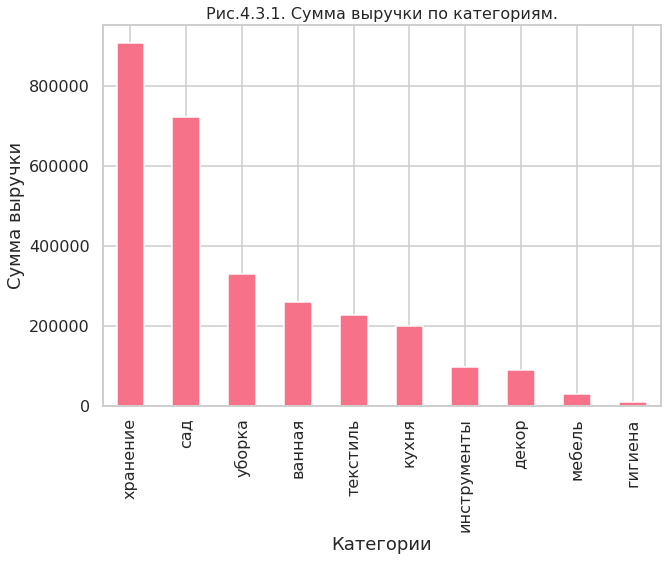

In [63]:
# Построим график по сумме выручки по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, color='#f77189', 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.1. Сумма выручки по категориям.', fontsize=16)
plt.xlabel('Категории')
plt.ylabel('Cумма выручки')
plt.show()

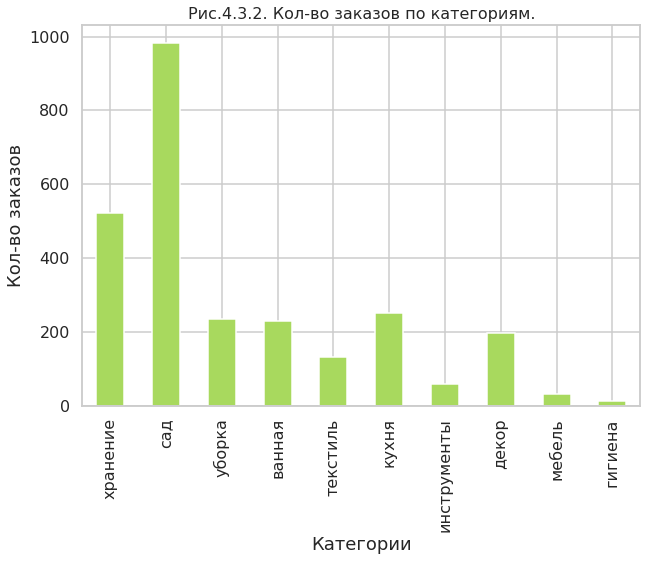

In [64]:
# Построим график по кол-ву заказов по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, color='#a8d95e', 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.2. Кол-во заказов по категориям.', fontsize=16)
plt.xlabel('Категории')
plt.ylabel('Кол-во заказов')
plt.show()

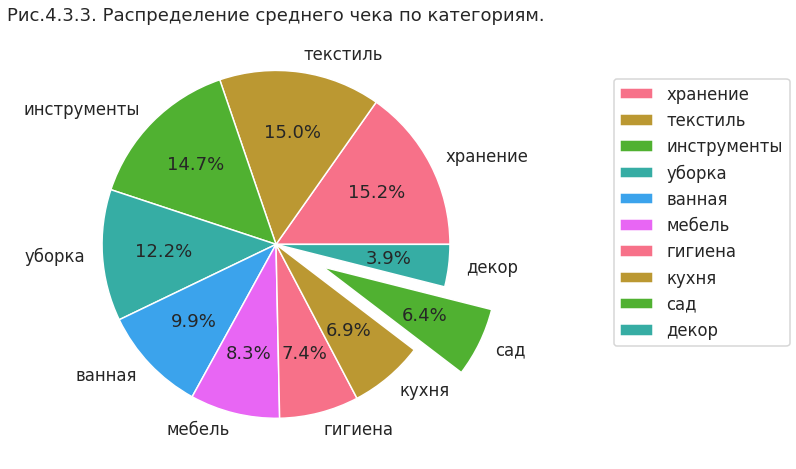

In [65]:
# Построим круговую диаграмму.
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')
(groupby_category.sort_values(by='revenue_per_order', ascending=False)\
                 .plot(kind='pie', y=['revenue_per_order'], figsize=(8, 8), autopct='%1.1f%%',
                      explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0), pctdistance=0.65)\
                 .set(ylabel=''))
plt.title('Рис.4.3.3. Распределение среднего чека по категориям.', fontsize=18)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

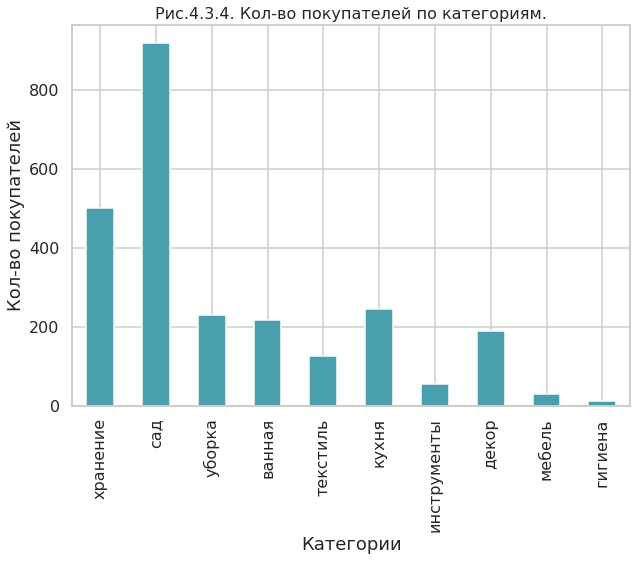

In [66]:
# Построим график по кол-ву покупателей по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['customers'], figsize=(10,7), grid=True, color='#489fae', 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.4. Кол-во покупателей по категориям.', fontsize=16)
plt.xlabel('Категории')
plt.ylabel('Кол-во покупателей')
plt.show()

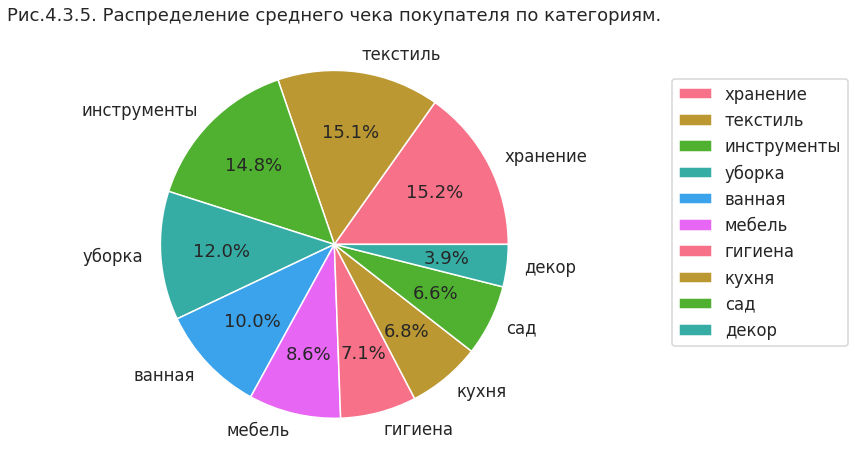

In [67]:
# Построим круговую диаграмму.
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')
(groupby_category.sort_values(by='revenue_per_customer', ascending=False)\
                 .plot(kind='pie', y=['revenue_per_customer'], figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.65)\
                 .set(ylabel=''))
plt.title('Рис.4.3.5. Распределение среднего чека покупателя по категориям.', fontsize=18)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

### Вывод

 - Если смотреть по сумме выручки, самая прибыльная категория — это «хранение», затем идёт категория «сад». Менее прибыльная категория «гигиена».
 - Если смотреть по количеству заказов, самые продаваемые товары категории «сад», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад», а остальные — дополнительные. 
 - Если смотреть по среднему чеку, по показателю эффективности продаж, то категория «сад» как основной ассортимент товара, дает самую малую выручку. Чтобы улучшить данный показатель следует, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения. 
 - Основной доход интернет- магазина это от категорий «текстиль», «хранение», «инструменты» и «уборка».

### 4.4. Поищем сезонность товаров по категориям. Проанализируем продажи по категориям по временам года. 

In [68]:
# Напишем функцию season, принимающую номер месяца от 1 до 12, 
# и возвращающую время года, которому этот месяц принадлежит (весна, лето, осень или зима).
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

In [69]:
# Cоздадим отдельный столбец с временами года в зависимости от месяца, 
# и в его ячейках записать значения, возвращаемые функцией.
ecommerce['season'] = ecommerce['month'].apply(season)
display(ecommerce.shape)
ecommerce.sample(10)

(4443, 17)

,datetime,customer_id,order_id,product,quantity,price,revenue,hour,day,week,month,year,date,weekdays,weekends,category,season
2863,2019-04-15 18:00:00,07be909f-f388-49b9-9cb4-efdf8b1cec25,14646,пеларгония зональная диам. 12 см коралловая полумахровая,1,188.00,188.00,18,1,16,4,2019,2019-04-15,1,0,cад,весна
3204,2019-04-27 16:00:00,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,"томата помидор ""золотая канарейка"" №32 сорт индетерминантный среднеспелый желтый",1,38.00,38.00,16,6,17,4,2019,2019-04-27,0,1,cад,весна
2823,2019-04-14 00:00:00,f7d7e00a-5cec-43c0-acba-d979f2f52c8a,71131,искусственный цветок анемона пластиковая желтая,1,37.00,37.00,0,7,15,4,2019,2019-04-14,0,1,декор,весна
177,2018-10-10 15:00:00,b1603989-dd5b-4fcb-a0ce-1e2cd985d2a0,68601,пеларгония душистая d-13 см,1,149.00,149.00,15,3,41,10,2018,2018-10-10,1,0,cад,осень
2866,2019-04-15 20:00:00,25c0bea0-5760-4269-8f37-4ee903d3f8e1,71159,гардения d-9 см,1,59.00,59.00,20,1,16,4,2019,2019-04-15,1,0,cад,весна
5768,2019-07-09 23:00:00,d7497f95-4d83-4df6-b09b-781e31d482ed,71924,сушилка для белья напольная ника сбп1/с 18 м,1,599.00,599.00,23,2,28,7,2019,2019-07-09,1,0,cад,лето
3009,2019-04-22 10:00:00,f31458f9-8b2e-421b-a0f2-5480f80ab7ce,14669,пеларгония зональная диам. 12 см лососевая махровая,2,150.00,300.00,10,1,17,4,2019,2019-04-22,1,0,cад,весна
3161,2019-04-25 17:00:00,28195156-9812-4a27-a3e3-a1ebf41b5d64,14693,калибрахоа mini famous double red красная махровая объем 05 л,1,90.00,90.00,17,4,17,4,2019,2019-04-25,1,0,cад,весна
1106,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69208,чайник электрический василиса т33-2000 нержавеющая сталь красный 2000 вт 2 л,1,749.00,749.00,19,2,49,12,2018,2018-12-04,1,0,кухня,зима
864,2018-11-19 13:00:00,a22a06d8-ba39-4ee0-be74-84f471cd18a6,69050,вешалки мягкие для деликатных вещей 3 шт желтые,4,164.00,656.00,13,1,47,11,2018,2018-11-19,1,0,хранение,осень


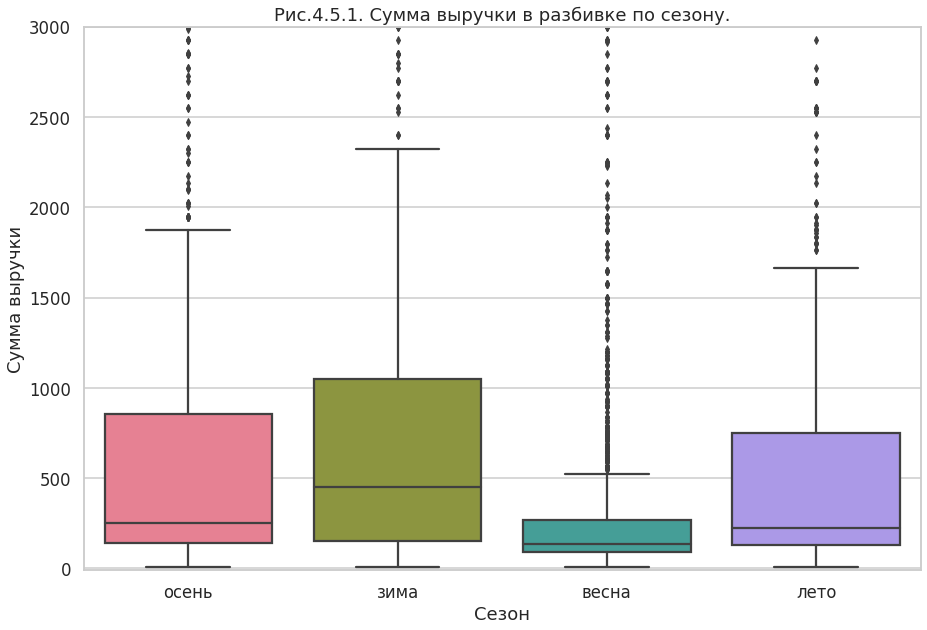

In [70]:
# Построим график «ящик с усами» по выручке в разбивке по времени года.
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(x='season', y='revenue', data=ecommerce, palette='husl').set_ylim(-10, 3000)
plt.title('Рис.4.5.1. Сумма выручки в разбивке по сезону.', fontsize=18)
plt.xlabel('Сезон')
plt.ylabel('Сумма выручки')
plt.show()

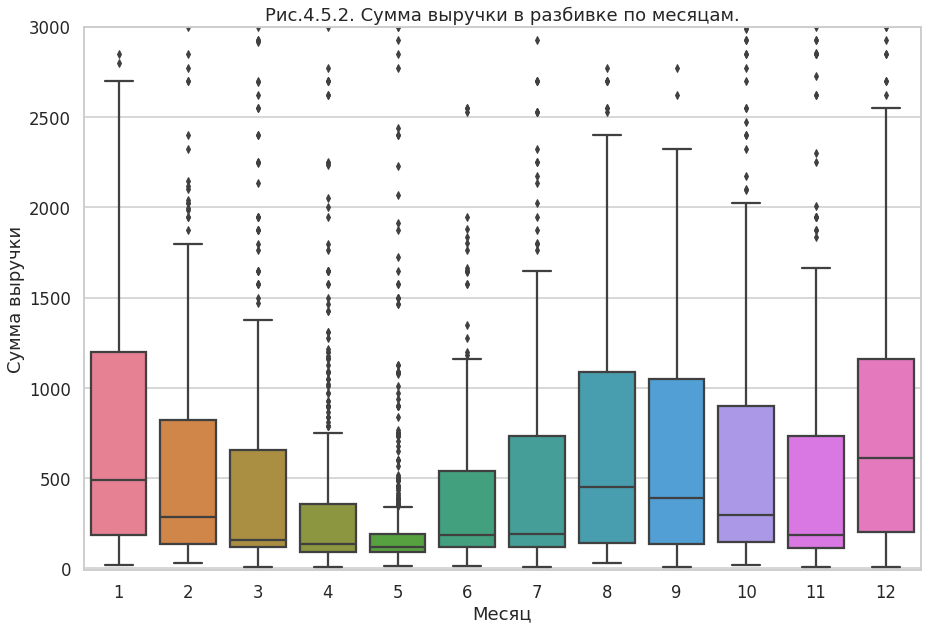

In [71]:
# Построим график «ящик с усами» по выручке в разбивке по месяцам.
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('whitegrid')  
sns.set_context('talk')
sns.boxplot(x='month', y='revenue', data=ecommerce, palette='husl').set_ylim(-10, 3000)
plt.title('Рис.4.5.2. Сумма выручки в разбивке по месяцам.', fontsize=18)
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.show()

### Проанализируем продажи по категориям по временам года.

In [72]:
# Создадим датасеты по категориям.
storage_category = ecommerce.query('category == "хранение"')
furniture_category = ecommerce.query('category == "мебель"')
kitchen_category = ecommerce.query('category == "кухня"')
bathroom_category = ecommerce.query('category == "ванная"')
textile_category = ecommerce.query('category == "текстиль"')
garden_category = ecommerce.query('category == "cад"')
cleaning_category = ecommerce.query('category == "уборка"')
instruments_category = ecommerce.query('category == "инструменты"')
hygiene_category = ecommerce.query('category == "гигиена"')
decor_category = ecommerce.query('category == "декор"')

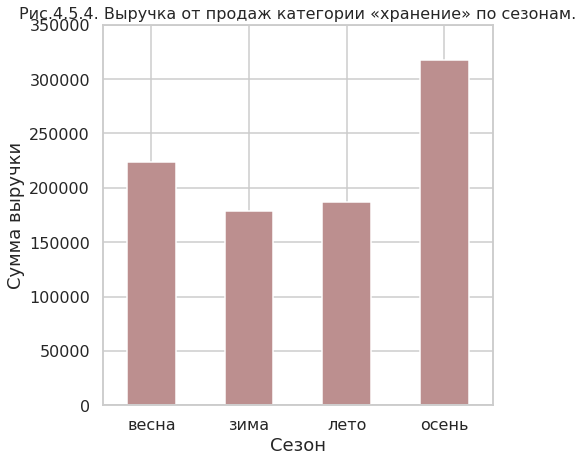

In [73]:
# Выручка от продаж категории «хранение» по сезонам.
storage_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#BC8F8F', fontsize=16, legend=False)\
                .set_ylim(-100, 350000)
plt.title('Рис.4.5.4. Выручка от продаж категории «хранение» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

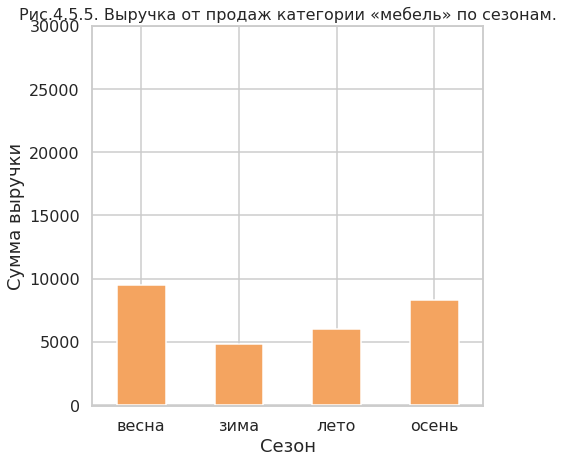

In [74]:
# Выручка от продаж категории «мебель» по сезонам.
furniture_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#F4A460', fontsize=16, legend=False)\
                .set_ylim(-100, 30000)
plt.title('Рис.4.5.5. Выручка от продаж категории «мебель» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

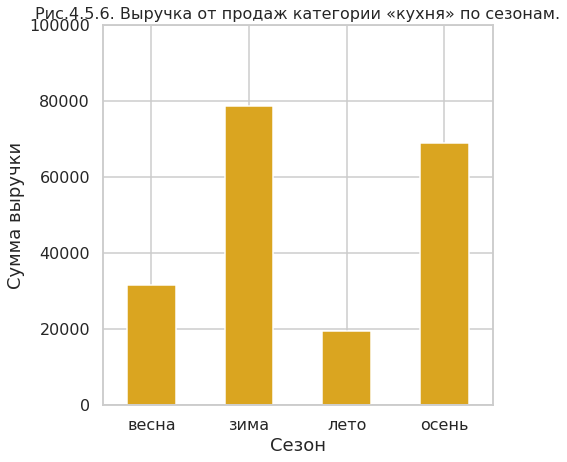

In [75]:
# Выручка от продаж категории «кухня» по сезонам.
kitchen_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#DAA520', fontsize=16, legend=False)\
                .set_ylim(-100, 100000)
plt.title('Рис.4.5.6. Выручка от продаж категории «кухня» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

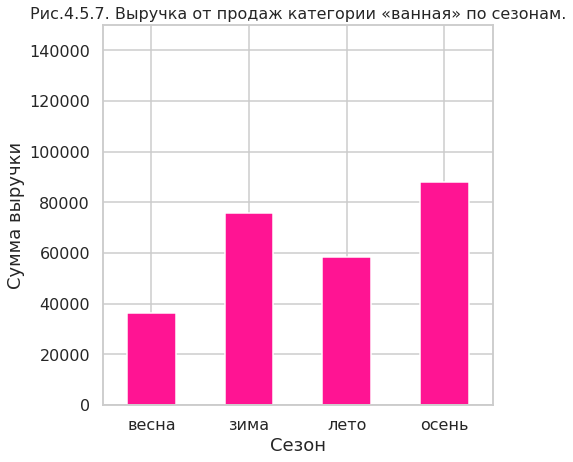

In [76]:
# Выручка от продаж категории «ванная» по сезонам.
bathroom_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#FF1493', fontsize=16, legend=False)\
                .set_ylim(-100, 150000)
plt.title('Рис.4.5.7. Выручка от продаж категории «ванная» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

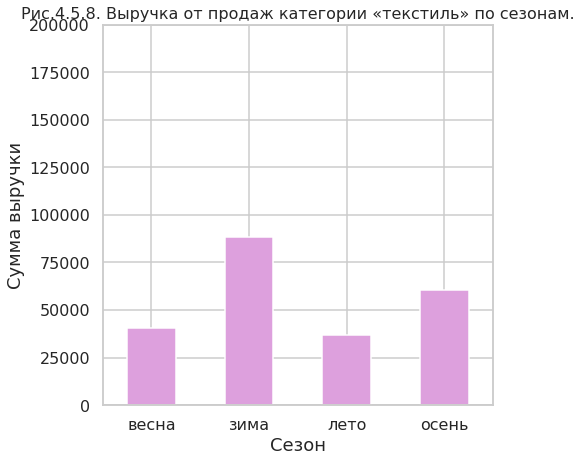

In [77]:
# Выручка от продаж категории «текстиль» по сезонам.
textile_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#DDA0DD', fontsize=16, legend=False)\
                .set_ylim(-100, 200000)
plt.title('Рис.4.5.8. Выручка от продаж категории «текстиль» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

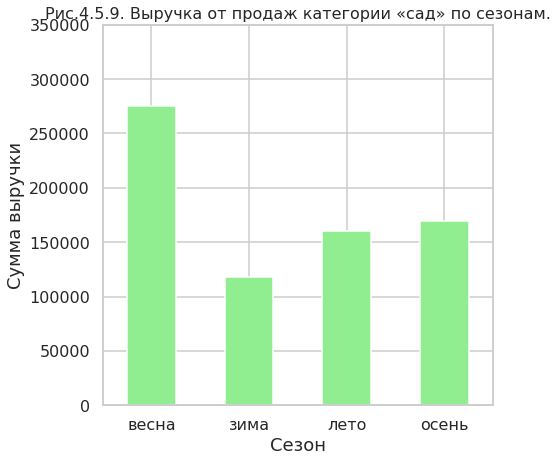

In [78]:
# Выручка от продаж категории «cад» по сезонам.
garden_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#90EE90', fontsize=16, legend=False)\
                .set_ylim(-100, 350000)
plt.title('Рис.4.5.9. Выручка от продаж категории «cад» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

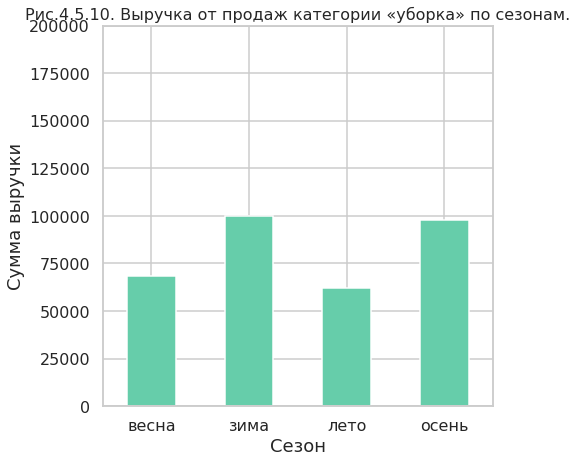

In [79]:
# Выручка от продаж категории «уборка» по сезонам.
cleaning_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#66CDAA', fontsize=16, legend=False)\
                .set_ylim(-100, 200000)
plt.title('Рис.4.5.10. Выручка от продаж категории «уборка» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

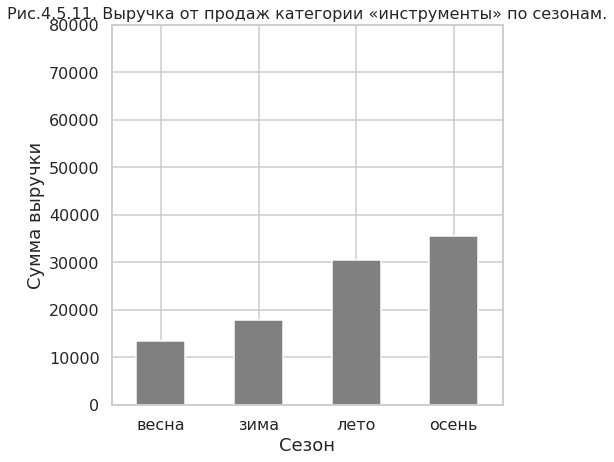

In [80]:
# Выручка от продаж категории «инструменты» по сезонам.
instruments_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#808080', fontsize=16, legend=False)\
                .set_ylim(-100, 80000)
plt.title('Рис.4.5.11. Выручка от продаж категории «инструменты» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

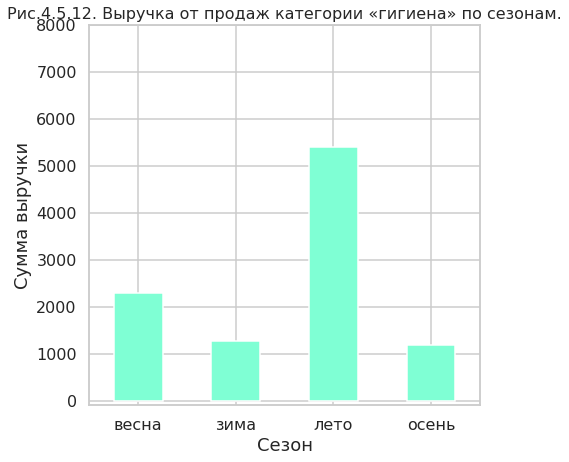

In [81]:
# Выручка от продаж категории «гигиена» по сезонам.
hygiene_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#7FFFD4', fontsize=16, legend=False)\
                .set_ylim(-100, 8000)
plt.title('Рис.4.5.12. Выручка от продаж категории «гигиена» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

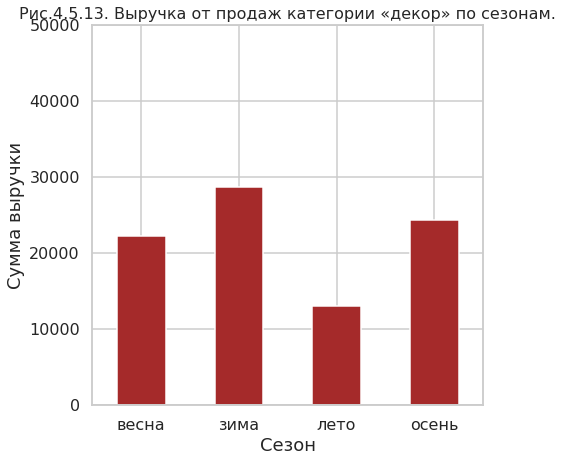

In [82]:
# Выручка от продаж категории «декор» по сезонам.
decor_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#A52A2A', fontsize=16, legend=False)\
                .set_ylim(-100, 50000)
plt.title('Рис.4.5.13. Выручка от продаж категории «декор» по сезонам.', fontsize=16)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

### Вывод

Сумма выручки в разбивке по сезону, показала, что, самый прибыльный период — это осенне-зимний. То есть, наибольшие объемы продаж приходятся на III и IV квартал года. Самые низкие доходы в весенний сезон, в месяц май. В разбивке по месяцам, это более наглядно. Относительно 2018 и 2019 гг, также видно снижение объемов продаж.

Проанализировав продажи по категориям по временам года, наблюдается следующее разделение на периоды по доходам с категорий:
     - Период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор».    
     - Период весенне-летний, прибыльный по категориям ««гигиена», что логично.
     - Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль».

## Шаг 5. Сегментация покупателей на основе истории их покупок

Для сегментации покупателей, необходимо провести кластеризацию. Кластеризация поможет выделить покупателей и предложить каждому сегменту подходящий вариант продукта и точную коммуникацию. Для этого необходимо рассчитать матрицу расстояний между всеми признаками с помощью класса linkage.

### 5.1. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

In [83]:
# Проведем кластеризацию. Оставим только количественным данные.
clusters_data = ecommerce.pivot_table(index = 'product', aggfunc = {'order_id': 'nunique', 'quantity': 'sum', 
                                                      'price': 'mean',  'weekdays': 'sum', 'weekends': 'sum'})
clusters_data.columns = ['orders', 'quantity', 'price', 'weekdays', 'weekends'] # переименуем столбцы 
clusters_data.sample(10)

,orders,quantity,price,weekdays,weekends
product,,,,,
базилик смесь зеленого и фиолетового 04 г 4660010775433,2,11.00,2,1,1
флокс растопыренный голубой объем 05 л,1,97.00,1,1,0
рассада томата помидор сорт любимец подмосковья кассета по 6шт,1,116.00,1,0,1
газания рассада однолетних цветов в кассете по 6 шт,3,162.33,3,3,0
полки qwerty италия белый/серый 40х14х10 см 35х10х10 см 30х7х10 см 72006,3,1949.00,4,3,0
капуста декоративная смесь 01 г 4650091480234,1,11.00,1,1,0
искусственная композиция из цветов пластиковая лилия мини лиловая,3,74.00,8,2,1
пеларгония зональная розоцветная ред розебад red rosebud,1,375.00,1,1,0
"паста для полировки ""гои"" 25 гр",1,15.00,1,1,0


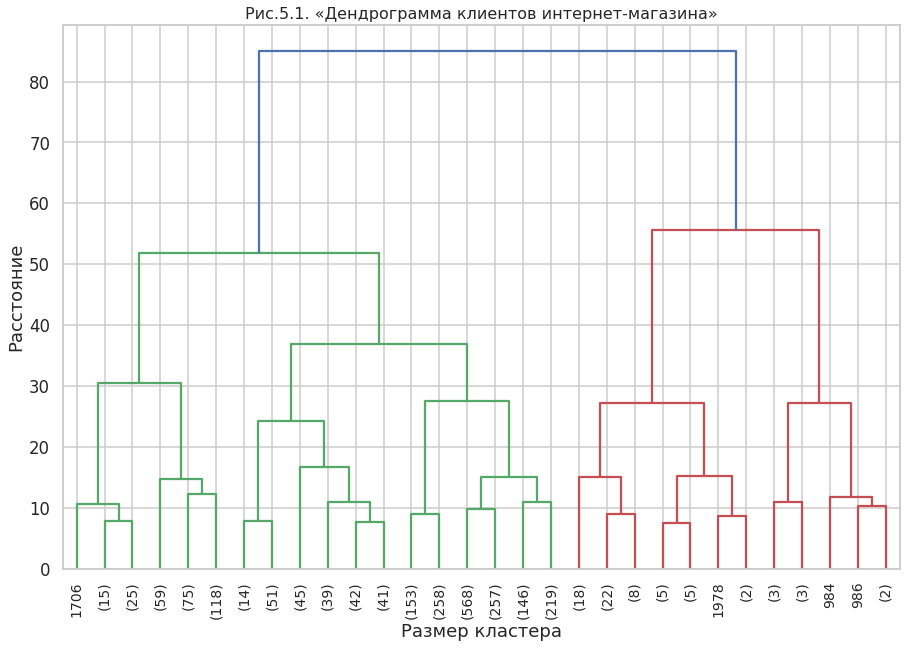

In [84]:
# Стандартизируем данные. Создим объект класса Scaler.
scaler = StandardScaler()

# Обучим нормализатор и преобразуем набор данных. Без целевой переменной.
X_st = scaler.fit_transform(clusters_data)

# Расчитаем матрицу расстояний с помощью метода linkage.
linked = linkage(X_st, method = 'ward')

# Построим график дендрограмма.
plt.figure(figsize=(15, 10)) 
dendrogram(linked, orientation='top', show_leaf_counts=True, truncate_mode='lastp', p=30, leaf_rotation=90, 
           leaf_font_size=14)
plt.title("Рис.5.1. «Дендрограмма клиентов интернет-магазина»", fontsize=16)
plt.xlabel("Размер кластера")
plt.ylabel("Расстояние")
plt.show()

### Вывод

Предложенное оптимальное `число кластеров 2`.

### 5.2. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем сегменты покупателей.

Алгоритм K-Means группирует пошагово все объекты. Вот принцип его работы: 
 - Есть K кластеров. Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе. 
 - Центры корректируются (меняют своё положение) до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра. 
 - Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным. 

Разобравшись в устройстве алгоритма, запустим его в JupyterNotebook.

In [85]:
# Кластеризация методом k-средни.
# задаём модель k_means с числом кластеров n=2
k_means = KMeans(n_clusters = 2, random_state=1)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 1)
labels = k_means.fit_predict(X_st)

# присваиваю каждому наблюдению в датафрейме соответствующее значение кластера 
clusters_data['cluster_km'] = labels
clusters_data 

,orders,quantity,price,weekdays,weekends,cluster_km
product,,,,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.00,1,1,0,1
tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.00,1,1,0,1
tepмокружка avex recharge 500 мл голубой avex0681,2,2099.00,2,2,0,1
автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,1,7229.00,1,0,1,1
агератум рассада однолетних цветов в кассете по 10 шт,1,210.00,2,0,1,1
...,...,...,...,...,...,...
ясколка войлочная белая объем 05 л,3,97.00,3,3,0,1
ящик для хранения textilebox curver 57 л 34x20x13 см прозрачный 03003-001-00,1,224.00,3,1,0,1
ящик для хранения фимако люкс плетеный с крышкой m бежевый,1,749.00,2,0,1,1


### Вывод

Кластеризация по алгоритму K-Means выполнена.

### 5.3. Посмотрим на статистику по сегментам покупателей.

In [86]:
# Найдём выручку и средний чек покупателя avg_check — разделим показатель revenue на orders.
clusters_data['revenue'] = clusters_data['quantity'] * clusters_data['price']
clusters_data['avg_check'] = clusters_data['revenue'] / clusters_data['orders']
# Выводим статистику по кластерам.
display(clusters_data.groupby(['cluster_km']).mean().T)

cluster_km,0,1
orders,18.67,1.70
quantity,176.80,641.07
price,32.26,3.10
weekdays,14.24,1.31
weekends,4.45,0.39
revenue,5096.00,1233.77
avg_check,279.37,837.89


### Вывод

**Кластер 0**
 - Среднее количество заказов 18 заказов.
 - Среднее количество товара 177 товара.
 - Средняя суммарная выручка 5096 д.е.
 - Среднее количество будних дней 14.
 - Среднее количество выходных 4.
 - Средний чек заказа 279 д.е.

**Кластер 1**
 - Среднее количество заказов 1 заказов.
 - Среднее количество товара 641 товара.
 - Средняя суммарная выручка 1233 д.е.
 - Среднее количество будних дней 1.
 - Среднее количество выходных 0.
 - Средний чек заказа 837 д.е.

По результатам видим, что профили покупателей очень различаются. Скорей всего кластер 1 – это  оптовики, они покупают один раз с большим количеством товара, поэтому и средний чек больше. Кластер 0, это обычные покупатели, которые совершают покупки несколько раз на протяжении недели с небольшим количеством товара. У кластера 0 объём продаж больше. На них и нужно ориентироваться. 

## Шаг 6. Проверка статистических гипотез

### 6.1. Посчитаем статистическую значимость различий в среднем чеке заказа между сегментами покупателей. 

Гипотеза №1.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между между сегментами покупателей.

In [87]:
# Генерируем две независимые выборки. 
cluster0 = clusters_data[clusters_data['cluster_km']==0]['avg_check']
cluster1 = clusters_data[clusters_data['cluster_km']==1]['avg_check']

**Найдем соотношение дисперсий, и в случае различия более чем на 5 %, принять, что дисперсии не равны.**

In [88]:
# Оценим дисперсию по выборке cluster0 и cluster1.
print("Дисперсия 0-го кластера: {} ".format(np.var(cluster0, ddof=1)))
print("Дисперсия 1-го кластера: {} ".format(np.var(cluster1, ddof=1)))
print("Соотношение дисперсий: {} ".format((np.var(cluster1, ddof=1))/(np.var(cluster0, ddof=1))))

Дисперсия 0-го кластера: 50915.91918526776 
Дисперсия 1-го кластера: 2530522.9905951703 
Соотношение дисперсий: 49.700035491598534 


In [89]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(cluster0, cluster1) #alternative='two-sided'

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.043276240222238666
Отвергаем нулевую гипотезу


In [90]:
print("Медиана 0-го кластера: {} ".format(int(np.median(cluster0))))
print("Медиана 1-го кластера: {} ".format(int(np.median(cluster1))))

Медиана 0-го кластера: 192 
Медиана 1-го кластера: 285 


### Вывод

P-value = 0,043 значительно меньше 0,05. Значит, есть причины отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. То есть, есть статистически значимое различие в среднем чеке между между сегментами покупателей.

### 6.2. Посчитаем статистическую значимость различий в среднем объёме продаж между сегментами покупателей.

Гипотеза №2.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем объёме продаж между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

In [91]:
# Генерируем две независимые выборки.
sales_volume_cluster0 = clusters_data[clusters_data['cluster_km']==0]['revenue']
sales_volume_cluster1 = clusters_data[clusters_data['cluster_km']==1]['revenue']

In [92]:
# Оценим дисперсию по выборке sales_volume_cluster0 и sales_volume_cluster1.
print("Дисперсия 0-го кластера: {} ".format(np.var(sales_volume_cluster0, ddof=1)))
print("Дисперсия 1-го кластера: {} ".format(np.var(sales_volume_cluster1, ddof=1)))
print("Соотношение дисперсий: {} ".format((np.var(sales_volume_cluster1, ddof=1))/(np.var(sales_volume_cluster0, ddof=1))))

Дисперсия 0-го кластера: 52514918.98190382 
Дисперсия 1-го кластера: 6028373.261363636 
Соотношение дисперсий: 0.11479353635565848 


In [93]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(sales_volume_cluster0, sales_volume_cluster1) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.753868139909477e-18
Отвергаем нулевую гипотезу


In [94]:
print("Медиана 0-го кластера: {} ".format(int(np.median(sales_volume_cluster0))))
print("Медиана 1-го кластера: {} ".format(int(np.median(sales_volume_cluster1))))

Медиана 0-го кластера: 3059 
Медиана 1-го кластера: 449 


### Вывод

P-value значительно меньше 0,05, это говорит о том, что есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

### 6.3. Проверим одинаковые средние объёмы продаж в будни и выходные или нет.

Гипотеза №3.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Средние объёмы продаж в будни и выходные одинаковые.
 - **Альтернативная гипотеза H₁**: Средние объёмы продаж в будни и выходные разные.

In [95]:
# Генерируем две независимые выборки.
sales_volume_weekdays = ecommerce[ecommerce['weekdays']==1]['revenue']
sales_volume_weekends = ecommerce[ecommerce['weekends']==1]['revenue']

In [96]:
# Оценим дисперсию по выборке sales_volume_weekdays и sales_volume_weekends.
print("Дисперсия объём продаж в будни: {} ".format(np.var(sales_volume_weekdays, ddof=1)))
print("Дисперсия объём продаж в выходные: {} ".format(np.var(sales_volume_weekends, ddof=1)))
print("Соотношение дисперсий: {} ".format((np.var(sales_volume_weekdays, ddof=1))/(np.var(sales_volume_weekends, ddof=1))))

Дисперсия объём продаж в будни: 2217754.218909134 
Дисперсия объём продаж в выходные: 880093.3318257248 
Соотношение дисперсий: 2.5199079901088166 


In [97]:
print("Стандартное отклонение объём продаж в будни: {} ".format(np.std(sales_volume_weekdays, ddof=1)))
print("Стандартное отклонение объём продаж в выходные: {} ".format(np.std(sales_volume_weekends, ddof=1)))

Стандартное отклонение объём продаж в будни: 1489.212617093051 
Стандартное отклонение объём продаж в выходные: 938.1328966760119 


In [98]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind.
alpha = 0.05

results = st.ttest_ind(sales_volume_weekdays, sales_volume_weekends) #equal_var = False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11081800979300933
Не получилось отвергнуть нулевую гипотезу


In [99]:
print("Cреднее значение объём продаж в будни: {} ".format(int(np.mean(sales_volume_weekdays))))
print("Cреднее значение объём продаж в выходные: {} ".format(int(np.mean(sales_volume_weekends))))

Cреднее значение объём продаж в будни: 663 
Cреднее значение объём продаж в выходные: 585 


### Вывод

Исходя из теста мы видим, что средние объёмы продаж в будни и выходные одинаковые. Не получилось отвергнуть нулевую гипотезу.

## Шаг 7. Общие выводы и рекомендации

Подводя итоги, имеющиеся факты:

**ПО РЕЗУЛЬТАТАМ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ:**

Данными которыми располагаем: с 2018-10-01 по 2019-10-31, один год и один месяц. 

**По «очищенным данным»:**
 - Имеем 2347 уникальных покупателей совершивших 2507 заказа за 395 дней.
 - Большинство покупателей совершило всего 1 заказ.
 - Покупателей, заказавших 3 заказа совсем мало.
 - Среднее кол-во уникальных покупателей за день: 6 человек.
 - Среднее кол-во уникальных покупателей за неделю: 42 человек. Это небольшая цифра.
 - Среднее кол-во уникальных покупателей за месяц: 183 человек.
 - Месячная аудитория: 3.41%, очевидно, что к интернет-магазину обращаются нечасто.

Рост активности покупателей виден с декабря 2018 по февраль 2019. Заметно снижение активности с апреля до конца июня 2019 года. В июле 2019 виден небольшой рост по кол-ву уникальных покупателей. Активность покупателей больше всего проявляется в конце и начале года.

**Заказы**
 - Большинство заказов совершаются в первой половине дня с 9 до 15. Пик приходится на 11 часов. Меньше всего клиенты заказываю ночью.
 - С воскресенья виден рост по совершению заказов. Пик приходится на вторник, с наибольшим кол-во заказов. Потом видим снижение, меньше всего заказывают в субботу.
 - В апреле и феврале 2019 было сделано больше всего заказов, это связано с активностью клиентов. То есть, количество совершивших заказов, зависит от активности покупателей.

**Выручка**
 - Сумма выручки: 2 867 516.00 д.e.
 - Средняя выручка с покупателя: 645.40 д.e.
 - День недели вторник в 13:00 дня самый продуктивный, приносит больше всего выручки.
 - **`В течение всего периода 2018-2019 г.г. наблюдается негативная динамика суммарной выручки от продаж.`** Общая сумма выручки в конце 2019 г. сократилась почти в 1,5 раза, относительно прошлого года. Возможно причиной могло послужить общее ухудшение  условий предпринимательской деятельности.
 - Темп роста продаж = (выручка текущего периода / выручка прошлого периода) * 100 = (170429 / 243892) * 100 = 69,87%. Так, в 2019 году темп роста продаж интернет-магазина составил 69,87% по сравнению с 2018 годом. Мы видим, что `динамика продаж отрицательная.`
 - `Снижение доходов с продаж также видно по среднему чеку покупателя`. В октябре 2018 года средний чек покупателя составлял 1417,98, а через год, в октябре 2019 г. 1065,18 д.е.

**Топ-5 самых прибыльных товара за весь период** 
 - простынь вафельная 200х180 см wellness 
 - урна уличная "гео" hobbyka/хоббика
 - мусорный контейнер hailo bigbin swing 45
 - одеяло wellness t142 белое темостеганое 140х205 см
 - сушилка уличная leifheit 85210 linomatic 

**Топ-5 самых продаваемых товаров за весь период**
 - эхинокактус грузони d-5 см	
 - коврик придверный attribute nature кокосовый 60x40 см amc015	
 - простынь вафельная 200х180 см wellness rw180-01 100% хлопок	
 - цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см	
 - муляж яблоко зеленый 9 см полиуретан	

Судя по матрице корреляций, наблюдается логическая взаимозависимость между переменными. Есть небольшая взаимозависимость выручки с ценой товара, corr = 0,67, то есть чем выше цена товара, тем больше выручка. Также, есть другие переменные, которые положительно коррелируют с выручкой, это количество заказов и товара.

**ПО РЕЗУЛЬТАТАМ АНАЛИЗА ТОВАРНОГО АССОРТИМЕНТА**

 - `Самую большую долю товарного ассортимента занимает категория «сад» 57%` от общего количества товарного ассортимента, её можно считать **основной**. В эту категорию вошли все растения, рассада и элементы для дачи и сада. 
 - Потом идет категория «хранение» 13%, «кухня» 7%, «декор» 6%, «уборка» 6% и «ванная» 6%, как **дополнительный ассортимент**.

**Самые продаваемые товары в каждой категории по кол-ву заказов за весь период:**
 - В категории «cад» самый продаваемый товар: пеларгония розебудная red pandora
 - В категории «хранение» самый продаваемый товар: сумка-тележка 2-х колесная gimi argo синяя
 - В категории «уборка» самый продаваемый товар: таз пластмассовый со стиральной доской
 - В категории «декор» самый продаваемый товар: муляж персики мини полиуретан
 - В категории «текстиль» самый продаваемый товар: подкладка под чехол zalger
 - В категории «ванная» самый продаваемый товар: корыто, оцинкованное 45 л бесшовное
 - В категории «кухня» самый продаваемый товар: кувшин пластмассовый с крышкой "кумган" 20 л
 - В категории «мебель» самый продаваемый товар: карниз для ванной комнаты виолет раздвижной
 - В категории «инструменты» самый продаваемый товар: стяжка оконная с болтом ст-55 цинк 1
 - В категории «гигиена» самый продаваемый товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис

**Самые прибыльные товары в каждой категории за весь период:**
 - В категории «текстиль» самый прибыльный товар: простынь вафельная 200х180 см wellness
 - В категории «хранение» самый прибыльный товар: сумка-тележка 2-х колесная gimi
 - В категории «уборка» самый прибыльный товар: гладильная доска ника blues
 - В категории «ванная» самый прибыльный товар: коврик придверный attribute nature кокосовый
 - В категории «cад» самый прибыльный товар: пеларгония розебудная red pandora
 - В категории «инструменты» самый прибыльный товар: стремянка colombo factotum 4 ступени алюминий
 - В категории «кухня» самый прибыльный товар: модульная стеклянная банка
 - В категории «гигиена» самый прибыльный товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис
 - В категории «мебель» самый прибыльный товар: карниз для ванной комнаты виолет раздвижной
 - В категории «декор» самый прибыльный товар: ткань универсальная из микрофибры micro magic серая

**Посчитали выручку и количество покупателей по категориям.**
 - Если смотреть `по сумме выручки`, самая прибыльная категория — это «хранение», затем идёт категория «сад». Менее прибыльная категория «гигиена».
 - Если смотреть `по количеству заказов`, самые продаваемые товары категории «сад», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад», а остальные — дополнительные.
 - Если смотреть `по среднему чеку`, по показателю эффективности продаж, то категория «сад» как основной ассортимент товара, дает маленькую выручку. 
 - `Основной доход интернет- магазина `это от категорий «текстиль», «хранение», «инструменты» и «уборка», то есть, от дополнительного ассортимента. 

**Проанализировали продажи по категориям по временам года.**
 - Сумма выручки в разбивке по сезону, показала, что, `самый прибыльный период — это осенне-зимний.` То есть, наибольшие объемы продаж приходятся на III и IV квартал года. `Самые низкие доходы в весенний сезон, в месяц май.` В разбивке по месяцам, это более наглядно. `Относительно 2018 и 2019 гг, также видно снижение объемов продаж.`

**Проанализировав продажи по категориям по сезонам, наблюдается следующее разделение на периоды по доходам с категорий:**
 - Период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор».    
 - Период весенне-летний, прибыльный по категориям ««гигиена», что логично.
 - Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль».

**ПО РЕЗУЛЬТАТАМ СЕГМЕНТАЦИИ ПОКУПАТЕЛЕЙ:**

**Кластер 0**
 - Среднее количество заказов 18 заказов.
 - Среднее количество товара 177 товара.
 - Средняя суммарная выручка 5096 д.е.
 - Среднее количество будних дней 14.
 - Среднее количество выходных 4.
 - Средний чек заказа 279 д.е.

**Кластер 1**
 - Среднее количество заказов 1 заказов.
 - Среднее количество товара 641 товара.
 - Средняя суммарная выручка 1233 д.е.
 - Среднее количество будних дней 1.
 - Среднее количество выходных 0.
 - Средний чек заказа 837 д.е.

По результатам видим, что профили покупателей очень различаются. Скорей всего кластер 1 – это  оптовики, они покупают один раз с большим количеством товара, поэтому и средний чек больше. Кластер 0, это обычные покупатели, которые совершают покупки несколько раз на протяжении недели с небольшим количеством товара. У кластера 0 объём продаж больше. На них и нужно ориентироваться. 

**ПО РЕЗУЛЬТАТАМ ГИПОТЕЗ:**
 - Средний чек между сегментами покупателей разный.
 - Средние объёмы продаж между сегментами покупателей разные.
 - Средние объёмы продаж в будни и выходные одинаковые.


**РЕКОМЕНДАЦИИ:**
 - **Улучшить средний чек категории «сад» как основной ассортимент товара.** Для этого необходимо, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.

 - **Увеличить объёмы продаж.** Поискать причину снижения доходов, для этого необходимо посмотреть на факторы, которые влияют на продажи. Факторы, могут быть следующими: 
     - общии условия предпринимательской деятельности, руководство, персонал;
     - каналы сбыта товара;
     - сезонная динамика продаж, товарный ассортимент. Учитывать, что, период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор». Период весенне-летний, прибыльный по категориям ««гигиена». Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль»;
     - количество покупателей ;
     - конкуренты;
     - общая динамика рынка.
 - **В зависимости от сезона, создавать актуальные рекомендательные предложения внутри товарной категории.**
 - **Также, у покупателей необходимо формировать привычку заходить в интернет-магазин почаще.**

## Шаг 8. Презентация и дашборд

**Ссылка на презентацию:** [E-commerce интернет-магазина «Пока все ещё тут»](https://yadi.sk/i/X2G6WaF-VH-gcA)

**Ссылка на дашборд:** [Дашдорд интернет-магазина](https://public.tableau.com/profile/iraida.fustii#!/vizhome/dashboard_ecommerce_project/dashboard_ecommerce_project)

Источники: 
 - «ЯНДЕКС.ПРАКТИКУМ»; 
 - «Python Data Analysis» Third Edition — BIRMINGHAM — MUMBAI.: Packt Publishing. ISBN 978-1-78995-524-8;
 - «Python для сложных задач: наука о данных и машинное обучение» — СПб.: Питер, 2018. — 576 с.: ил. — (Серия «Бестселлеры O’Reilly»). ISBN 978-5-496-03068-7.
 - Devpractice Team. Python. Визуализация данных. Matplotlib. Seaborn. Mayavi. - devpractice.ru. 2020. - 412 с.